# Capstone Project: Predicting Outcomes of Asylum Cases

**Author:** Paria Elyasi<br>
**Contact:** pariae@me.com<br>
**Date:** 09-19-2022<br>
**Notebook**: 3 of 5<br>

# Overview

Every year people come to the United States seeking protection because they have suffered persecution or fear that they will suffer persecution due to their race, belief, nationality, political opinion, or being members of particular social group. These people can apply for **Asylum** once they are in the United States.

There are two types of **Asylum**:
- **Affirmative Asylum**  
    - If affirmative application is denied, the applicant goes into removal/deportation proceedings and can file for defensive Asylum. 
    - Affirmative asylum cases are overseen by USCIS (U.S. Citizenship and Immigration Services). 
    
    
- **Defensive Asylum**
    - If the immigrant without an immigration status is put into removal proceedings, they can apply for defensive asylum.
    - Defensive Asylum cases are overseen by Immigration Judges.
    
    
It’s a long and difficult journey for those who seek asylum in the unites states. Their journey doesn’t end until they have their case outcome and that’s whether it was accepted or rejected. 

In this project, we will be predicting outcomes of asylum cases to assist immigration attorneys gain better insight and change their approaches accordingly for a favorable outcome. 

Note that we will be looking at defensive asylum cases. 

The data used in this project is from the U.S Department of Justice. Please see the citation below. For more details please refer to the **project report**.

**Please Note:** This is **notebook 3 of 5** that were used to make our final conclusions. In our previous notebook, we performed an Advanced Exploratory Data Analysis and Data Preprocessing to prepare our data for modeling. 

In **this notebook**, we will be building **machine learning models** to predict our **target** which is **`DECISION`**. We will **evaluate** each model and look at **feature importance**. 

**Project Citation**: 
U.S. Department of Justice, Executive Office for Immigration Review. EOIR Case Data (July 2019). Ann Arbor, MI: Inter-university Consortium for Political and Social Research [distributor], 2020-07-07. https://doi.org/10.3886/E120222V1

## Table of Contents

[1. Loading the Data](#Loading-the-Data)<br>
[2. Train-Test Split](#Preprocessing)<br>
[3. Scaling](#Scaling)<br>
[4. Modeling](#Models)<br>
* [4.1. Logistic Regression Model](#Logistic-Regression-Model)<br>
* [4.2. Decision Tree Model](#Decision-Tree-Model)<br>
* [4.3. Random Forest Model](#Random-Forest-Model)<br>
* [4.4. Supplementary Model - K-Nearest Neighbor (KNN)](#Supplementary-Model---K-Nearest-Neighbor-(KNN))<br>


[5. Model Summary and Evaluation](#Model-Summary-and-Evaluation)<br>
[6. Summary](#Summary)<br>

---

# Notebook 3

# Modeling

In our previous notebook, we performed an Advanced Exploratory Data Analysis and Data Preprocessing to prepare our data for modeling. 

In **this notebook**, we will be building **machine learning models** to predict our **target** which is **`DECISION`**. We will **evaluate** each model and look at **feature importance**. 

---

## Import Libraries

First we will import all the libraries we will be using for this project. 

In [1]:
#import all the libraries needed 

#basic packages/libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#library to split the data for modeling
from sklearn.model_selection import train_test_split

#library for scaling - all three scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


#library for logistic regression model
from sklearn.linear_model import LogisticRegression

#library to ignore warnings for logistic regression default solver if sklearn hasn't been updated
import warnings
warnings.filterwarnings('ignore')

#library for 'pickle' - to save fitted models and accuracies 
import joblib

#library for dimensionality reduction
from sklearn.decomposition import PCA

#libaray for cross validate
from sklearn.model_selection import cross_val_score

#library to build a pipeline
from sklearn.pipeline import Pipeline

#library for temporary directory for caching pipeline results
from tempfile import mkdtemp

#library for cross-validated grid search
from sklearn.model_selection import GridSearchCV

#libraries for model evaluation
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#library for f1 score
from sklearn.metrics import f1_score

#library for classification report
from sklearn.metrics import classification_report

In [2]:
#setting figure size
plt.rcParams['figure.figsize'] = (10, 7)

## Loading the Data

In this section we will be importing the data we preprocessed in the previous notebook and look at information such as the shape of our dataframe and column types once more as a sanity check.

In [3]:
#load our data 
df_asylum = pd.read_csv('data/asylum_dataset_modelv2.csv')

In [4]:
#check data
pd.set_option('display.max_columns', None) #display max columns
df_asylum.head()

,DECISION,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR,NATIONALITY_ALBANIA,NATIONALITY_ALGERIA,NATIONALITY_ANGOLA,NATIONALITY_ANGUILLA,NATIONALITY_ANTIGUA AND BARBUDA,NATIONALITY_ARGENTINA,NATIONALITY_ARMENIA,NATIONALITY_ARUBA,NATIONALITY_AUSTRALIA,NATIONALITY_AUSTRIA,NATIONALITY_AZERBAIJAN,NATIONALITY_BAHAMAS,NATIONALITY_BAHRAIN,NATIONALITY_BANGLADESH,NATIONALITY_BARBADOS,NATIONALITY_BE REMOVED FROM THE UNITED STATES,NATIONALITY_BELARUS,NATIONALITY_BELGIUM,NATIONALITY_BELIZE,NATIONALITY_BENIN,NATIONALITY_BERMUDA,NATIONALITY_BHUTAN,NATIONALITY_BOLIVIA,NATIONALITY_BOSNIA-HERZEGOVINA,NATIONALITY_BOTSWANA,NATIONALITY_BRAZIL,NATIONALITY_BRITISH VIRGIN ISLANDS,NATIONALITY_BRUNEI,NATIONALITY_BULGARIA,NATIONALITY_BURKINA FASO,NATIONALITY_BURMA (MYANMAR),NATIONALITY_BURUNDI,NATIONALITY_BYELORUSSIA (BELARUS),NATIONALITY_CAMBODIA,NATIONALITY_CAMEROON,NATIONALITY_CANADA,NATIONALITY_CAPE VERDE,NATIONALITY_CAYMAN ISLANDS,NATIONALITY_CENTRAL AFRICAN REPUBLIC,NATIONALITY_CHAD,NATIONALITY_CHILE,NATIONALITY_CHINA,NATIONALITY_COLOMBIA,NATIONALITY_COMORO ISLANDS,NATIONALITY_CONGO,NATIONALITY_COSTA RICA,NATIONALITY_CROATIA,NATIONALITY_CUBA,NATIONALITY_CYPRUS,NATIONALITY_CZECH REPUBLIC,NATIONALITY_CZECHOSLOVAKIA,NATIONALITY_DEMOCRATIC REPUBLIC OF CONGO,NATIONALITY_DENMARK,NATIONALITY_DJIBOUTI,NATIONALITY_DOMINICA,NATIONALITY_DOMINICAN REPUBLIC,NATIONALITY_EAST GERMANY,NATIONALITY_EAST TIMOR,NATIONALITY_ECUADOR,NATIONALITY_EGYPT,NATIONALITY_EL SALVADOR,NATIONALITY_EQUATORIAL GUINEA,NATIONALITY_ERITREA,NATIONALITY_ESTONIA,NATIONALITY_ETHIOPIA,NATIONALITY_FEDERATED STATES OF MICRONESIA,NATIONALITY_FIJI,NATIONALITY_FINLAND,NATIONALITY_FRANCE,NATIONALITY_FRENCH GUIANA,NATIONALITY_FRENCH POLYNESIA,NATIONALITY_FRENCH WEST INDIES,NATIONALITY_GABON,NATIONALITY_GAMBIA,NATIONALITY_GAZA STRIP,NATIONALITY_GEORGIA,NATIONALITY_GERMANY,NATIONALITY_GHANA,NATIONALITY_GIBRALTAR,NATIONALITY_GREECE,NATIONALITY_GRENADA,NATIONALITY_GUADELOUPE,NATIONALITY_GUATEMALA,NATIONALITY_GUINEA,NATIONALITY_GUINEA BISSAU,NATIONALITY_GUYANA,NATIONALITY_HAITI,NATIONALITY_HOLLAND,NATIONALITY_HONDURAS,NATIONALITY_HONG KONG,NATIONALITY_HUNGARY,NATIONALITY_ICELAND,NATIONALITY_INDIA,NATIONALITY_INDONESIA,NATIONALITY_IRAN,NATIONALITY_IRAQ,NATIONALITY_IRELAND,NATIONALITY_ISRAEL,NATIONALITY_ITALY,NATIONALITY_IVORY COAST (COTE D'IVOIRE),NATIONALITY_JAMAICA,NATIONALITY_JAPAN,NATIONALITY_JORDAN,NATIONALITY_KAMPUCHEA,NATIONALITY_KAZAKHSTAN,NATIONALITY_KENYA,NATIONALITY_KIRGHIZIA (KYRGYZSTAN),NATIONALITY_KOSOVO,NATIONALITY_KUWAIT,NATIONALITY_LAOS,NATIONALITY_LATVIA,NATIONALITY_LEBANON,NATIONALITY_LESOTHO,NATIONALITY_LIBERIA,NATIONALITY_LIBYA,NATIONALITY_LITHUANIA,NATIONALITY_LUXEMBOURG,NATIONALITY_MACAU,NATIONALITY_MACEDONIA,NATIONALITY_MADAGASCAR,NATIONALITY_MALAWI,NATIONALITY_MALAYSIA,NATIONALITY_MALI,NATIONALITY_MALTA,NATIONALITY_MARTINIQUE,NATIONALITY_MAURITANIA,NATIONALITY_MAURITIUS,NATIONALITY_MEXICO,NATIONALITY_MIDWAY ISLANDS,NATIONALITY_MOLDAVIA (MOLDOVA),NATIONALITY_MONACO,NATIONALITY_MONGOLIA,NATIONALITY_MONTENEGRO,NATIONALITY_MONTSERRAT,NATIONALITY_MOROCCO,NATIONALITY_MOZAMBIQUE,NATIONALITY_NAMIBIA,NATIONALITY_NEPAL,NATIONALITY_NETHERLANDS,NATIONALITY_NETHERLANDS ANTILLES,NATIONALITY_NEW ZEALAND,NATIONALITY_NICARAGUA,NATIONALITY_NIGER,NATIONALITY_NIGERIA,NATIONALITY_NORTH KOREA,NATIONALITY_NORWAY,NATIONALITY_OMAN,NATIONALITY_PAKISTAN,NATIONALITY_PALESTINE,NATIONALITY_PANAMA,NATIONALITY_PAPUA NEW GUINEA,NATIONALITY_PARAGUAY,NATIONALITY_PEOPLE'S REPUBLIC OF BENIN,NATIONALITY_PERU,NATIONALITY_PHILIPPINES,NATIONALITY_PITCAIRN ISLANDS,NATIONALITY_POLAND,NATIONALITY_PORTUGAL,NATIONALITY_QATAR,NATIONALITY_ROMANIA,NATIONALITY_RUSSIA,NATIONALITY_RWANDA,NATIONALITY_SAMOA,NATIONALITY_SAO TOME AND PRINCIPE,NATIONALITY_SAUDI ARABIA,NATIONALITY_SENEGAL,NATIONALITY_SERBIA MONTENEGRO,NATIONALITY_SEYCHELLES,NATIONALITY_SIERRA LEONE,NATIONALITY_SINGAPORE,NATIONALITY_SLOVAK REPUBLIC,NATI

In [5]:
#check shape
df_asylum.shape

(482829, 1037)

In [6]:
print(f'Our dataset has {df_asylum.shape[0]} rows and {df_asylum.shape[1]} columns.')

Our dataset has 482829 rows and 1037 columns.


In [7]:
#check info
df_asylum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482829 entries, 0 to 482828
Columns: 1037 entries, DECISION to ATTY_REP_Yes
dtypes: int64(1037)
memory usage: 3.7 GB


In [8]:
#check for null values
df_asylum.isna().sum().sum()

0

In [9]:
#check class distribution
df_asylum['DECISION'].value_counts(normalize=True)*100

0    87.657328
1    12.342672
Name: DECISION, dtype: float64

As noted in the previous notebooks as well, we have an imbalanced class distribution. We will start modeling first and then decide on **upsampling, downsampling or SMOTE** to fix this imbalance. 

We will note that since our baseline prediction is at ~**88%**, our model will have a high accuracy to begin with prior to deciding on fixing the imbalance. 

Next we will define our X and y. 

In [10]:
#define X and y
X = df_asylum.drop(columns='DECISION')
y = df_asylum['DECISION']

In [11]:
#check X
X.head()

,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR,NATIONALITY_ALBANIA,NATIONALITY_ALGERIA,NATIONALITY_ANGOLA,NATIONALITY_ANGUILLA,NATIONALITY_ANTIGUA AND BARBUDA,NATIONALITY_ARGENTINA,NATIONALITY_ARMENIA,NATIONALITY_ARUBA,NATIONALITY_AUSTRALIA,NATIONALITY_AUSTRIA,NATIONALITY_AZERBAIJAN,NATIONALITY_BAHAMAS,NATIONALITY_BAHRAIN,NATIONALITY_BANGLADESH,NATIONALITY_BARBADOS,NATIONALITY_BE REMOVED FROM THE UNITED STATES,NATIONALITY_BELARUS,NATIONALITY_BELGIUM,NATIONALITY_BELIZE,NATIONALITY_BENIN,NATIONALITY_BERMUDA,NATIONALITY_BHUTAN,NATIONALITY_BOLIVIA,NATIONALITY_BOSNIA-HERZEGOVINA,NATIONALITY_BOTSWANA,NATIONALITY_BRAZIL,NATIONALITY_BRITISH VIRGIN ISLANDS,NATIONALITY_BRUNEI,NATIONALITY_BULGARIA,NATIONALITY_BURKINA FASO,NATIONALITY_BURMA (MYANMAR),NATIONALITY_BURUNDI,NATIONALITY_BYELORUSSIA (BELARUS),NATIONALITY_CAMBODIA,NATIONALITY_CAMEROON,NATIONALITY_CANADA,NATIONALITY_CAPE VERDE,NATIONALITY_CAYMAN ISLANDS,NATIONALITY_CENTRAL AFRICAN REPUBLIC,NATIONALITY_CHAD,NATIONALITY_CHILE,NATIONALITY_CHINA,NATIONALITY_COLOMBIA,NATIONALITY_COMORO ISLANDS,NATIONALITY_CONGO,NATIONALITY_COSTA RICA,NATIONALITY_CROATIA,NATIONALITY_CUBA,NATIONALITY_CYPRUS,NATIONALITY_CZECH REPUBLIC,NATIONALITY_CZECHOSLOVAKIA,NATIONALITY_DEMOCRATIC REPUBLIC OF CONGO,NATIONALITY_DENMARK,NATIONALITY_DJIBOUTI,NATIONALITY_DOMINICA,NATIONALITY_DOMINICAN REPUBLIC,NATIONALITY_EAST GERMANY,NATIONALITY_EAST TIMOR,NATIONALITY_ECUADOR,NATIONALITY_EGYPT,NATIONALITY_EL SALVADOR,NATIONALITY_EQUATORIAL GUINEA,NATIONALITY_ERITREA,NATIONALITY_ESTONIA,NATIONALITY_ETHIOPIA,NATIONALITY_FEDERATED STATES OF MICRONESIA,NATIONALITY_FIJI,NATIONALITY_FINLAND,NATIONALITY_FRANCE,NATIONALITY_FRENCH GUIANA,NATIONALITY_FRENCH POLYNESIA,NATIONALITY_FRENCH WEST INDIES,NATIONALITY_GABON,NATIONALITY_GAMBIA,NATIONALITY_GAZA STRIP,NATIONALITY_GEORGIA,NATIONALITY_GERMANY,NATIONALITY_GHANA,NATIONALITY_GIBRALTAR,NATIONALITY_GREECE,NATIONALITY_GRENADA,NATIONALITY_GUADELOUPE,NATIONALITY_GUATEMALA,NATIONALITY_GUINEA,NATIONALITY_GUINEA BISSAU,NATIONALITY_GUYANA,NATIONALITY_HAITI,NATIONALITY_HOLLAND,NATIONALITY_HONDURAS,NATIONALITY_HONG KONG,NATIONALITY_HUNGARY,NATIONALITY_ICELAND,NATIONALITY_INDIA,NATIONALITY_INDONESIA,NATIONALITY_IRAN,NATIONALITY_IRAQ,NATIONALITY_IRELAND,NATIONALITY_ISRAEL,NATIONALITY_ITALY,NATIONALITY_IVORY COAST (COTE D'IVOIRE),NATIONALITY_JAMAICA,NATIONALITY_JAPAN,NATIONALITY_JORDAN,NATIONALITY_KAMPUCHEA,NATIONALITY_KAZAKHSTAN,NATIONALITY_KENYA,NATIONALITY_KIRGHIZIA (KYRGYZSTAN),NATIONALITY_KOSOVO,NATIONALITY_KUWAIT,NATIONALITY_LAOS,NATIONALITY_LATVIA,NATIONALITY_LEBANON,NATIONALITY_LESOTHO,NATIONALITY_LIBERIA,NATIONALITY_LIBYA,NATIONALITY_LITHUANIA,NATIONALITY_LUXEMBOURG,NATIONALITY_MACAU,NATIONALITY_MACEDONIA,NATIONALITY_MADAGASCAR,NATIONALITY_MALAWI,NATIONALITY_MALAYSIA,NATIONALITY_MALI,NATIONALITY_MALTA,NATIONALITY_MARTINIQUE,NATIONALITY_MAURITANIA,NATIONALITY_MAURITIUS,NATIONALITY_MEXICO,NATIONALITY_MIDWAY ISLANDS,NATIONALITY_MOLDAVIA (MOLDOVA),NATIONALITY_MONACO,NATIONALITY_MONGOLIA,NATIONALITY_MONTENEGRO,NATIONALITY_MONTSERRAT,NATIONALITY_MOROCCO,NATIONALITY_MOZAMBIQUE,NATIONALITY_NAMIBIA,NATIONALITY_NEPAL,NATIONALITY_NETHERLANDS,NATIONALITY_NETHERLANDS ANTILLES,NATIONALITY_NEW ZEALAND,NATIONALITY_NICARAGUA,NATIONALITY_NIGER,NATIONALITY_NIGERIA,NATIONALITY_NORTH KOREA,NATIONALITY_NORWAY,NATIONALITY_OMAN,NATIONALITY_PAKISTAN,NATIONALITY_PALESTINE,NATIONALITY_PANAMA,NATIONALITY_PAPUA NEW GUINEA,NATIONALITY_PARAGUAY,NATIONALITY_PEOPLE'S REPUBLIC OF BENIN,NATIONALITY_PERU,NATIONALITY_PHILIPPINES,NATIONALITY_PITCAIRN ISLANDS,NATIONALITY_POLAND,NATIONALITY_PORTUGAL,NATIONALITY_QATAR,NATIONALITY_ROMANIA,NATIONALITY_RUSSIA,NATIONALITY_RWANDA,NATIONALITY_SAMOA,NATIONALITY_SAO TOME AND PRINCIPE,NATIONALITY_SAUDI ARABIA,NATIONALITY_SENEGAL,NATIONALITY_SERBIA MONTENEGRO,NATIONALITY_SEYCHELLES,NATIONALITY_SIERRA LEONE,NATIONALITY_SINGAPORE,NATIONALITY_SLOVAK REPUBLIC,NATIONALITY_S

In [12]:
#check y
y.head()

0    0
1    0
2    0
3    1
4    0
Name: DECISION, dtype: int64

In [13]:
#check shape for both X and y
print(f'Shape of X is : {X.shape}')
print(f'Shape of y is : {y.shape}')

Shape of X is : (482829, 1036)
Shape of y is : (482829,)


Great, now that we have our X and y set we can take a Train set and a Test set for our modeling.

## Train-Test Split

In this section we will be splitting our dataset into Train and Test. Note that as we will be using a Train and Validation set later, we will initially call it our Remainder (Train + Validation) and Test split.

We will set our test size as 30% (train size will be 70% of our dataset). Note that between 30% to 20% is ideal for test size. 

In [14]:
#split our X and y into remainder (train + validation) and test sets
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [15]:
#check shape for X_remainder and y_remainder
print(f'Shape of X_remainder set: {X_remainder.shape}')
print(f'Shape of y_remainder set: {y_remainder.shape}')

Shape of X_remainder set: (337980, 1036)
Shape of y_remainder set: (337980,)


In [16]:
#check shape for X_test and y_test
print(f'Shape of X_test set: {X_test.shape}')
print(f'Shape of y_test set: {y_test.shape}')

Shape of X_test set: (144849, 1036)
Shape of y_test set: (144849,)


Now that we have our remainder (validation + train) set and test set, we will scale our features. 

## Scaling

Scaling is an important part of data preprocessing which is done before modeling. Our models will work better if our features are on similar scale.

To understand the different magnitudes of our features, let's visualize the distribution of our unscaled data for the non-binary features. 

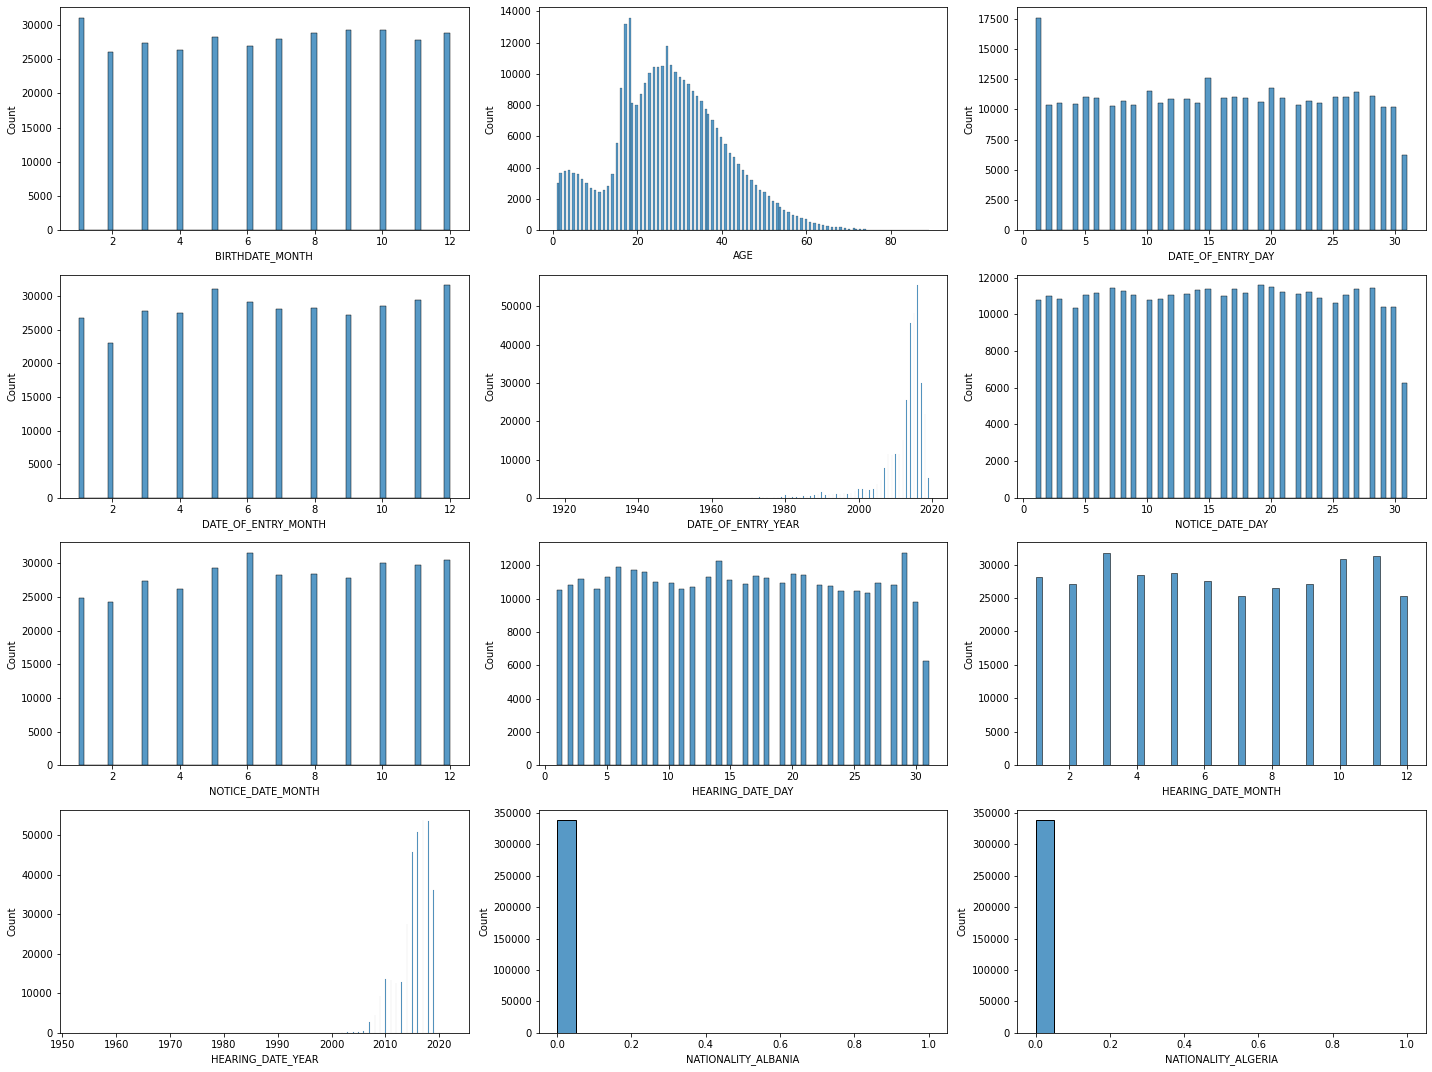

In [17]:
#visualize distribution of unscaled data for non-binary features
col_names = X_remainder.iloc[:, : 12].columns
plot_num = 1

plt.subplots(4,3, figsize=(20,15))

for col in col_names:
    plt.subplot(4,3,plot_num)
    sns.histplot(X_remainder[col])
    plot_num +=1

plt.tight_layout()
plt.show()

We can see that some of these features are not normally distributed and are on very different scales. Let's also look at the statistical summary of these features.

In [18]:
#look at the statistical info
X_remainder.iloc[:, : 12].describe()

,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR,NATIONALITY_ALBANIA,NATIONALITY_ALGERIA
count,337980.000000,337980.000000,337980.000000,337980.000000,337980.000000,337980.000000,337980.000000,337980.000000,337980.000000,337980.000000,337980.000000,337980.000000
mean,6.532904,27.741488,15.531644,6.656305,2012.265338,15.792988,6.695260,15.726889,6.476232,2015.364581,0.000843,0.000136
std,3.476565,13.106208,8.922895,3.437305,6.663854,8.766369,3.412331,8.784709,3.461213,3.009335,0.029026,0.011666
min,1.000000,1.000000,1.000000,1.000000,1918.000000,1.000000,1.000000,1.000000,1.000000,1953.000000,0.000000,0.000000
25%,4.000000,18.000000,8.000000,4.000000,2011.000000,8.000000,4.000000,8.000000,3.000000,2014.000000,0.000000,0.000000
50%,7.000000,27.000000,15.000000,7.000000,2014.000000,16.000000,7.000000,16.000000,6.000000,2016.000000,0.000000,0.000000
75%,10.000000,36.000000,23.000000,10.000000,2016.000000,23.000000,10.000000,23.000000,10.000000,2018.000000,0.000000,0.000000
max,12.000000,89.000000,31.000000,12.000000,2019.000000,31.000000,12.000000,31.000000,12.000000,2022.000000,1.000000,1.000000


We can see that in all the non-binary columns in our dataset, there are features that vary is magnitude and scaling them would help put these feature values on a similar scale.

Since we have a lot of binary features, we will use `MinMaxScaler()` for scaling our data. Min-Max Scaler would scale our non binary features to have values between 0 and 1 which would put them in the same scale as our binary values which are either 0 or 1. 

In [19]:
#MinMax Scaler

#instantiate
scaler = MinMaxScaler()

#fit  - on remiander set
scaler.fit(X_remainder)

#transform - on both remainder and test set
X_remainder_scaled = scaler.transform(X_remainder)
X_test_scaled = scaler.transform(X_test)

Now that we have scaled our features, we can start modeling. 

# Models 

In this section we will use 3 different classifiers and develope different Machine Learning Models:
- Logistic Regression Model
- Decision Trees / Random Forest
- K-Nearest Neighbor (KNN)

Let's get started with our first model which is **logistic regression model**.

### Logistic Regression Model

In this section we will be fitting a **logistic regression model** and look at it's performance and accuracy in predicting our target (`DECISION`).

The first model we will be fitting is a baseline vanilla model to see how the performance is. Later we will assess and find optimal hyperparameter values. 

In [20]:
#Logistic Regression Model - IFS (Instantiate - Fit - Score)
#instantiate
baseline_logreg_model = LogisticRegression(random_state=1)

#fit
baseline_logreg_model.fit(X_remainder_scaled, y_remainder)

#score
print(f'Accuracy on remainder set: {baseline_logreg_model.score(X_remainder_scaled, y_remainder)}')
print(f'Accuracy on test set: {baseline_logreg_model.score(X_test_scaled, y_test)}')

Accuracy on remainder set: 0.9321705426356589
Accuracy on test set: 0.9317565188575689


We don't see any overfitting, however our model is slightly doing better than randomly guessing. As mentioned previously our target is imbalanced with **88% in class 0** and **12% in class 1**. 

Let's try to optimize the hyperparameters in our logistic regression model using a validation set. 

We will split out remainder dataset into train and validation and try different weights (C) to see what is the optiamal C value. 

In [21]:
#split the remainder set into train and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, y_remainder, test_size=0.30, random_state=1, stratify=y_remainder)

#print info on how the data has been split
print(f'The train set has {len(X_train)} data points.')
print(f'The validation set has {len(X_validation)} data points.')

The train set has 236586 data points.
The validation set has 101394 data points.


Let's check the shape for all sets one again. 

In [22]:
#check shape 
print(f'Shape of test set: {X_test.shape}')
print(f'Shape of validation set: {X_validation.shape}')
print(f'Shape of train set: {X_train.shape}')

Shape of test set: (144849, 1036)
Shape of validation set: (101394, 1036)
Shape of train set: (236586, 1036)


Let's check to make sure the class proportions have been preserved in all sets.

In [23]:
print('Proportions in remainder set:')
print(y_remainder.value_counts()/len(y_remainder), '\n')

print('Proportions in test set:')
print(y_test.value_counts()/len(y_test), '\n')

print('Proportions in train set:')
print(y_train.value_counts()/len(y_train), '\n')

print('Proportions in validation set:')
print(y_validation.value_counts()/len(y_validation), '\n')

Proportions in remainder set:
0    0.876573
1    0.123427
Name: DECISION, dtype: float64 

Proportions in test set:
0    0.876575
1    0.123425
Name: DECISION, dtype: float64 

Proportions in train set:
0    0.876573
1    0.123427
Name: DECISION, dtype: float64 

Proportions in validation set:
0    0.876571
1    0.123429
Name: DECISION, dtype: float64 



Great, from the above numbers we can see that the class proportions have been preserved.
Next we will scale our train and validation set.

In [24]:
#scale X_train and X_validation

#MinMax Scaler

#instantiate
scaler = MinMaxScaler()

#fit - only the train set
scaler.fit(X_train)

#transform - both train and validation set
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

Now that we have scaled our train and validation sets, we can look for the optimal C value by applying different ranges C, fitting it to our training set and testing it on our training and validation set.
Once we find the optimal C value, we will apply it to our remainder and test set to find our model's accuracy scores.

In [25]:
#calculating score with ranges of C
train_scores = []
validation_scores = []

c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000]

for c in c_values:
    #instantiate
    logreg_model = LogisticRegression(penalty='l2', C = c, solver='lbfgs',random_state=1)
    #fit
    logreg_model.fit(X_train_scaled, y_train)
    #score
    train_scores.append(logreg_model.score(X_train_scaled, y_train))
    validation_scores.append(logreg_model.score(X_validation_scaled, y_validation))

In [26]:
#check the accuracies
pd.DataFrame({'C value': c_values, 'train accuracy': train_scores, 'validation accuracy': validation_scores})

,C value,train accuracy,validation accuracy
0,0.00001,0.876573,0.876571
1,0.00010,0.876578,0.876571
2,0.00100,0.911225,0.910162
3,0.10000,0.931031,0.929720
4,1.00000,0.932540,0.930982
5,10.00000,0.932422,0.930943
6,100.00000,0.932477,0.931061
7,1000.00000,0.932562,0.931071
8,10000.00000,0.932523,0.931071


Let's visualize the above values. Note that we will use a grid in our visualization to better see the values.

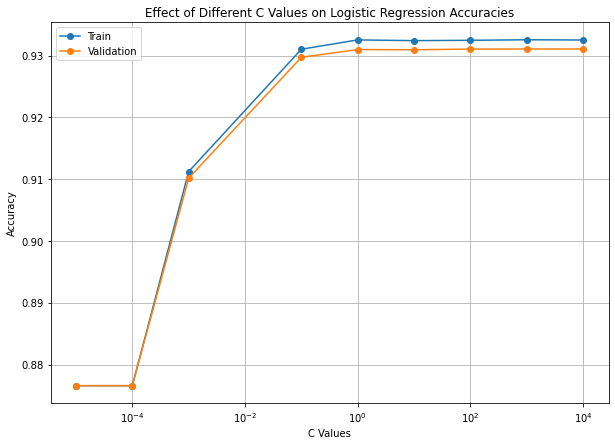

In [27]:
#plot the above to compare c values
plt.figure()
plt.plot(c_values, train_scores,label="Train",marker='o')
plt.plot(c_values, validation_scores,label="Validation",marker='o')
plt.xscale('log')
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.title('Effect of Different C Values on Logistic Regression Accuracies')
plt.legend()
plt.grid()
plt.show()

Looking at the above graph, we can see that after C value of 1, the train score and validation score are parallel and very close to one another without overfitting.

We will pick the C value that yields the highest validation accuracy and is close to the train accuracy. 

That would be C value of 1000. Now we can apply the C value to our model and score our test set.

In [28]:
#apply best performing C Value from above to our remainder and test set to see accuracy scores

#instantiate
logreg_model = LogisticRegression(penalty='l2', C = 1000, solver='lbfgs',random_state=1)

#fit
logreg_model.fit(X_remainder_scaled, y_remainder)

#score
print(f'Accuracy on remainder set: {logreg_model.score(X_remainder_scaled, y_remainder)}')
print(f'Accuracy on test set: {logreg_model.score(X_test_scaled, y_test)}')

Accuracy on remainder set: 0.932235635244689
Accuracy on test set: 0.9317220001518823


The remainder accuracy is similar to our train accuracy, and the test accuracy is similar (slightly higher - by ~ 0.06%) than the validation accuracy. We don't see overfitting or underfitting in our accuracy result which is good. 

Test accuracy is what we want to look at as this is how our model performs on **unseen** data. 

The reason our validation accuracy is slightly higher than our test accuracy is that we picked the optimal C value based on the datapoints in our train/validation set. 

A better option would be to use cross-validation which we will do in further down in the notebook. Note that cross-validation is computationally more expensive than just validating once (which is what we did above - we only used one validation). However note that still using one validation is a better option over not using one at all. 

Let's compare our baseline model and our optimized model together. 

**Logistic Regression Model Assessment** <br>
 
| Model   | Remainder Accuracy   | Test Accuracy|
|-------------|-------|----------|
| Baseline Log Reg Model | 0.932170542 |0.931756518
| Optimized Log Reg Model| 0.932235635|0.931722000

We didn't improve our test accuracy in our **Optimized Log Reg Model**, it is very similar to our baseline model. Note that we will be doing a 5 fold cross validation in later steps which will further help our model optimization.

There are other ways to help improve our model such as dimensionality reduction (PCA) which we will apply to our model as well. 

Next, we will look at our model coefficients to find features indicating acceptance and features indicating rejection. 

### Logistic Regression Model Coefficients 

In this section we will be looking at coefficients of our model to find 20 features most predictive of acceptance outcome and 20 features most predictive of rejection outcome. 

In order to find these, first we will look at our model coefficients. Note that the coefficients are in an array. We will check the shape and convert the array to a dataframe where the column names will be the indexes and coefficient values a column. 

Once the above steps are completed, we will extract 20 highest model coefficients predicting asylum case acceptance and 20 lowest model coefficients prediction asylum case rejection.

Let's start with looking at our model coefficients first. 

In [29]:
#look at the coefficients for our logistic regression model
coefficients = logreg_model.coef_
print(f'Coefficients: {coefficients}')

Coefficients: [[ 2.57236722e-02  8.19945530e-01  6.73260789e-03 ...  0.00000000e+00
  -6.24770040e-04  1.47197936e+00]]


As mentioned before, the model coefficients are given to us in an array. Let's look at the shape of this array.

In [30]:
#check the shape of the coefficients
coefficients.shape

(1, 1036)

As expected, we have **1 row** that includes our coefficient values for each feature and **1,036 columns** for our features. 

Next step is to convert the array to a dataframe. We will be setting the features (columns) as our index and the coefficient as a column that has the coefficient values for each feature/index in this case. 

In [31]:
#make a dataframe from the above coefficients - convert array to pandas dataframe
df_coef = pd.DataFrame({"coefficients": logreg_model.coef_[0]},index=X_remainder.columns).sort_values("coefficients", ascending=False)
df_coef

,coefficients
CASE_DESCRIPTION_Credible Fear Review,10.763365
CASE_DESCRIPTION_Reasonable Fear Case,10.076264
HEARING_DATE_YEAR,7.564336
IJ_CODE_ICD,3.255306
ALIEN_STATE_HI,2.805426
...,...
IJ_CODE_RFS,-2.454107
IJ_CODE_ASM,-2.521806
NATIONALITY_FEDERATED STATES OF MICRONESIA,-3.484266
DATE_OF_ENTRY_YEAR,-3.622325


Great, we have successfully made a dataframe where our features are the index and the coefficient values are in the coefficients column. 

Next we will make a new dataframe with only the top 20 coefficients for predicting asylum cases acceptance. 

In [32]:
#put the top 20 features indicating acceptance in a dataframe
acceptance_df = df_coef.head(20)
acceptance_df.index

Index(['CASE_DESCRIPTION_Credible Fear Review',
       'CASE_DESCRIPTION_Reasonable Fear Case', 'HEARING_DATE_YEAR',
       'IJ_CODE_ICD', 'ALIEN_STATE_HI', 'IJ_CODE_AAS', 'IJ_CODE_SSG',
       'IJ_CODE_DLM', 'IJ_CODE_MHB', 'NATIONALITY_CAMEROON', 'IJ_CODE_JWR',
       'IJ_CODE_REF', 'IJ_CODE_ATG', 'IJ_CODE_ACL', 'IJ_CODE_CAK',
       'IJ_CODE_JVJ', 'IJ_CODE_JRW', 'IJ_CODE_RBJ', 'IJ_CODE_TAB',
       'IJ_CODE_CSG'],
      dtype='object')

In [33]:
#check dataframe - top 20 coefficients
acceptance_df.head()

,coefficients
CASE_DESCRIPTION_Credible Fear Review,10.763365
CASE_DESCRIPTION_Reasonable Fear Case,10.076264
HEARING_DATE_YEAR,7.564336
IJ_CODE_ICD,3.255306
ALIEN_STATE_HI,2.805426


Let's visualize these.

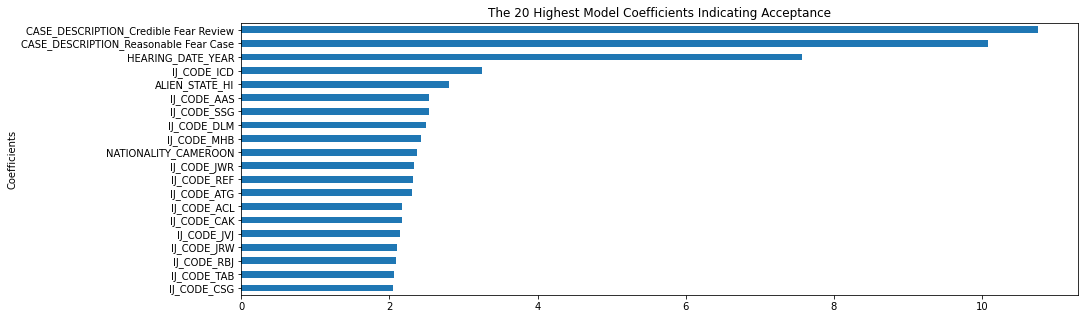

In [34]:
#plot top 20 features indicating acceptance
acceptance_df.sort_values(by='coefficients').plot(kind="barh", figsize=(15, 5), legend=False)
plt.title("The 20 Highest Model Coefficients Indicating Acceptance")
plt.ylabel("Coefficients")
plt.xticks(rotation=0)
plt.show()

Now that we have our coefficients predicting acceptance in the outcomes of asylum cases, let's discuss each in greater detail. 

Our top predictors predicting acceptance are:

**1. CASE_DESCRIPTION_Credible Fear Review** <br>
**2. CASE_DESCRIPTION_Reasonable Fear Case** <br>
**3. HEARING_DATE_YEAR** <br>
**4. IJ_CODE_ICD** <br>
**5. ALIEN_STATE_HI** <br>
**6. IJ_CODE_AAS** <br>
**7. IJ_CODE_SSG** <br>
**8. IJ_CODE_DLM** <br>
**9. IJ_CODE_MHB**<br>
**10. NATIONALITY_CAMEROON** <br>
**11. IJ_CODE_JWR** <br>
**12. IJ_CODE_REF** <br>
**13. IJ_CODE_ATG** <br>
**14. IJ_CODE_ACL** <br>
**15. IJ_CODE_CAK** <br>
**16. IJ_CODE_JVJ** <br>
**17. IJ_CODE_JRW** <br>
**18. IJ_CODE_RBJ** <br>
**19. IJ_CODE_TAB** <br>
**20. IJ_CODE_CSG** <br>

We can see that features such as `CASE_DESCRIPTION_Credible Fear Review` and `CASE_DESCRIPTION_Reasonable Fear Case` have high predicting coefficients. In our EDA notebook we had seen that 100% of cases with Credible Fear Review and Reasonable Fear Case were ACCEPTED therefore it makes sense that these are high predicting features in our model.

We can see that Case Type is an important feature in asylum case outcomes particularly Credible Fear Review and Reasonable Fear Case. 

`HEARING_DATE_YEAR` is also a strong predictor of predicting acceptance. The year the asylum case is overseen in the court can predict acceptance. 

We can also see that the immigration judge (`IJ_CODE`) that oversees the case is an important predictor on whether or not the case gets ACCEPTED. 

Case Type (credible fear and reasonable fear), Immigration Judge (certain judges - initials provided above), Year of Hearing Date, Residing State of Applicant (Hawaii in particular) and Nationality (Cameroon in particular) are all features with high coefficients in predicting acceptance of asylum cases. 

Let's look at the coefficients in predicting rejection. 

In [35]:
#bottom 20 coefficients
df_coef.sort_values(by='coefficients', ascending=True).head(20)

,coefficients
ABSENTIA_Yes,-7.441370
DATE_OF_ENTRY_YEAR,-3.622325
NATIONALITY_FEDERATED STATES OF MICRONESIA,-3.484266
IJ_CODE_ASM,-2.521806
IJ_CODE_RFS,-2.454107
IJ_CODE_SS2,-2.399191
IJ_CODE_SH,-2.009455
IJ_CODE_PJM,-1.979312
IJ_CODE_MG1,-1.945571
IJ_CODE_JLN,-1.894761


In [36]:
#put the bottom 20 features indicating/predicting rejection in a dataframe
rejection_df = df_coef.sort_values(by='coefficients', ascending=True).head(20)
rejection_df.index

Index(['ABSENTIA_Yes', 'DATE_OF_ENTRY_YEAR',
       'NATIONALITY_FEDERATED STATES OF MICRONESIA', 'IJ_CODE_ASM',
       'IJ_CODE_RFS', 'IJ_CODE_SS2', 'IJ_CODE_SH', 'IJ_CODE_PJM',
       'IJ_CODE_MG1', 'IJ_CODE_JLN', 'IJ_CODE_VBM', 'IJ_CODE_JAM',
       'IJ_CODE_VRW', 'IJ_CODE_DAR', 'NATIONALITY_GUATEMALA', 'IJ_CODE_SBN',
       'IJ_CODE_PMC', 'IJ_CODE_SHK', 'IJ_CODE_RBM', 'NATIONALITY_HONDURAS'],
      dtype='object')

Let's visualize these.

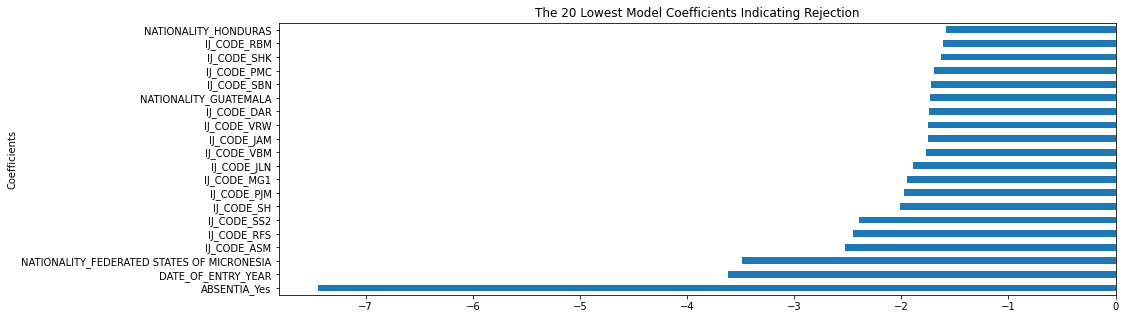

In [37]:
#plot bottom 20 features indicating/predicting rejection
rejection_df.sort_values(by='coefficients').plot(kind="barh", figsize=(15, 5), legend=False)
plt.title("The 20 Lowest Model Coefficients Indicating Rejection")
plt.ylabel("Coefficients")
plt.xticks(rotation=0)
plt.show()

Now that we have our coefficients predicting rejection in the outcomes of asylum cases, let's discuss each in greater detail. 

Our bottom coefficients predicting rejection are:

**1. ABSENTIA_Yes** <br>
**2. DATE_OF_ENTRY_YEAR** <br>
**3. NATIONALITY_FEDERATED STATES OF MICRONESIA** <br>
**4. IJ_CODE_ASM** <br>
**5. IJ_CODE_RFS** <br>
**6. IJ_CODE_SS2** <br>
**7. IJ_CODE_SH** <br>
**8. IJ_CODE_PJM** <br>
**9. IJ_CODE_MG1**<br>
**10. IJ_CODE_JLN** <br>
**11. IJ_CODE_VBM** <br>
**12. IJ_CODE_JAM** <br>
**13. IJ_CODE_VRW** <br>
**14. IJ_CODE_DAR** <br>
**15. NATIONALITY_GUATEMALA** <br>
**16. IJ_CODE_SBN** <br>
**17. IJ_CODE_PMC** <br>
**18. IJ_CODE_SHK** <br>
**19. IJ_CODE_RBM** <br>
**20. NATIONALITY_HONDURAS** <br>

We can see that feature `ABSENTIA_Yes` has the lowest coefficient and is the top predictor for asylum case rejection. We also saw in our EDA that applicants who were absent at their hearing were all rejected. Our model is using this feature to also predict rejection. 

`DATE_OF_ENTRY_YEAR` is also a strong predictor of predicting rejection, that's the year the asylee enters United States. 

We can also see that the immigration judge (`IJ_CODE`) that oversees the case is an important predictor on the case getting rejected. 

Being absent at the hearing, the year an asylee enters United States, Nationality (Micronesia, Guatemala, Honduras) and the immigration judge overseeing the asylum case are all features predictive of case rejection.

Now that we have looked at most predictive features for acceptance and rejection of asylum cases, we would like to see if we can reduce the number of features in our dataset. As seen, we have a lot of features in our dataset and wee would like to reduce these and test our model again. 

Next we will reduce the dimensionality of our dataset using Principal Component Analysis (PCA) and test our model's accuracy after applying PCA. 

### PCA - Reducing Dimensionality using Principle Component Analysis

In this section we will reduce the dimensionality of our dataset using Principle Components Analysis (PCA). 

Like scaling, we need to instantiate our PCA, fit to the scaled remainder set (this is our train + validation set), and transform on the scaled remainder (X_remainder_scaled) and scaled test set (X_test_scaled). 

When we instantiate our PCA, we need to specify the number of components we want to have with **n_components**, otherwise the default will generate the same number of Principle Components as our features. 

We can decide on a **threshold** for how much **variance needs to be explained** by the principle components.

Once the desired number/threshold of components is chosen, we will re-fit, then transform our sets with the PCA and input into our model to get our model's accuracy with the reduced dimensions. 

Next, we will follow the above steps to find the optimal number of components to apply to our PCA and then to our model.

#### PCA with 90% variance explained

First we will try `n_components` of 0.9 meaning we would like 90% of variance explained by our components. 

In [38]:
#instantiate
my_PCA = PCA(n_components = 0.9) #we would like 90% of the variance explained

#fit
my_PCA.fit(X_remainder_scaled)

#transform
X_remainder_PCA = my_PCA.transform(X_remainder_scaled)
X_test_PCA = my_PCA.transform(X_test_scaled)

In [39]:
print(f'Original: {X_remainder_scaled.shape}')
print(f'PCA Transformed: {X_remainder_PCA.shape}')

Original: (337980, 1036)
PCA Transformed: (337980, 182)


In [40]:
#calculate percentage of reduction in dimensions
X_remainder_PCA.shape[1]/X_remainder_scaled.shape[1]

0.17567567567567569

We have **reduced the number of dimensions by 83%**, from **1,036** dimensions to **182** dimensions. Let's fit our model with the PCA transformed data and score to see our new test accuracy.

In [41]:
#fit with the PCA transformed data
#instantiate
logreg_model_PCA = LogisticRegression(C = 10000, random_state=1)

#fit
logreg_model_PCA.fit(X_remainder_PCA, y_remainder)

#score
print(f'Accuracy on remainder set: {logreg_model_PCA.score(X_remainder_PCA, y_remainder)}')
print(f'Accuracy on test set: {logreg_model_PCA.score(X_test_PCA, y_test)}')

Accuracy on remainder set: 0.9258683945795609
Accuracy on test set: 0.926337082064771


**Logistic Regression Model Assessment** <br>
 
| Model   | Remainder Accuracy   | Test Accuracy|
|-------------|-------|----------|
| Baseline Log Reg Model | 0.932170542 |0.931756518
| Optimized Log Reg Model| 0.932235635|0.931722000
| PCA Log Reg Model - 90% Var | 0.925868394 |0.926337082

We can see that our remainder accuracy and our test accuracy dropped slightly . This is great, we were able to get very similar results by using almost **83% less** dimensions - 182 dimensional data vs. our original 1,036 dimensional data.

We can try to see how our model would score with PCA `n_components` set to 0.95 meaning 95% variance explained as well. 

#### PCA with 95% variance explained

Next we will try `n_components` of 0.95 meaning we would like 95% of variance explained by our components. Most likely we will have higher number of PCA's than the previous one. 

In [42]:
#instantiate
my_PCA = PCA(n_components = 0.95) #we would like 90% of the variance explained

#fit
my_PCA.fit(X_remainder_scaled)

#transform
X_remainder_PCA = my_PCA.transform(X_remainder_scaled)
X_test_PCA = my_PCA.transform(X_test_scaled)

In [43]:
print(f'Original: {X_remainder_scaled.shape}')
print(f'PCA Transformed: {X_remainder_PCA.shape}')

Original: (337980, 1036)
PCA Transformed: (337980, 317)


In [44]:
#calculate percentage of reduction in dimensions
X_remainder_PCA.shape[1]/X_remainder_scaled.shape[1]

0.305984555984556

This time we have **reduced the number of dimensions by 70%**, from 1,036 dimensions to 317 dimensions.

As expected we have higher number of PCAs since we increased the threshold for percentage of variance explained. 

Let's fit our model with the PCA transformed data and score to see our new test accuracy.

In [45]:
#fit with the PCA transformed data
#instantiate
logreg_model_PCA = LogisticRegression(C = 10000, random_state=1)

#fit
logreg_model_PCA.fit(X_remainder_PCA, y_remainder)

#score
print(f'Accuracy on remainder set: {logreg_model_PCA.score(X_remainder_PCA, y_remainder)}')
print(f'Accuracy on test set: {logreg_model_PCA.score(X_test_PCA, y_test)}')

Accuracy on remainder set: 0.9283537487425292
Accuracy on test set: 0.9283460707357317


**Logistic Regression Model Assessment** <br>
 
| Model   | Remainder Accuracy   | Test Accuracy|
|-------------|-------|----------|
| Baseline Log Reg Model | 0.932170542 |0.931756518
| Optimized Log Reg Model| 0.932235635|0.931722000
| PCA Log Reg Model - 90% Var | 0.925868394 |0.926337082
| PCA Log Reg Model - 95% Var | 0.928353748 |0.928346070

Again, our remainder accuracy and test accuracy are only slightly lower than our optimized logistic regression model and our baseline logistic regression model.

We were able to get very similar results by using almost **70% less dimensions** - 317 dimensional data vs. our original 1,036 dimensional data.

When working with large datasets such as the one we have, reducing the dimensionality using PCA is a great way to reduce model's run time while keeping the variance explained in the dataset with less dimensions. 

There are however some disadvantages to using PCA. 

PCA is not effective on data with no linear relationships. PCA is a linear dimensionality reduction and therefore it is not effective on data that has non-linear relationships. On data with non-linear relationships, more principle components (PCs) are needed and this means less dimensionality reduction. 

Also, when we use PCA to reduce the dimensionality of our data, we no longer are able to explain the features that are used and this adds complexity for when we want to present our results and explain the features to others.

Now that we have ran a logistic regression model and tried to optimize the hyperparameters and reduce dimensionality, we can evaluate our best Logistic Regression Model so far. 

Note that later in this notebook we will perform a 5-fold cross validation to optimize the hyperparameters of our model. We will do so on a subset of our data points as we have a large dataset and compare the results with other models and evaluate. 

Let's evaluate our best Logistic Regression model. 

### Model Evaluation - Best Logistic Regression Model

In this section we will be evaluating our best preforming logistic regression model.

Let's look at our model assessment chart again.

**Logistic Regression Model Assessment** <br>
 
| Model   | Remainder Accuracy   | Test Accuracy|
|-------------|-------|----------|
| Baseline Log Reg Model | 0.932170542 |0.931756518
| **Optimized Log Reg Model**| **0.932235635**|**0.931722000**
| PCA Log Reg Model - 90% Var | 0.925868394 |0.926337082
| PCA Log Reg Model - 95% Var | 0.928353748 |0.928346070



We will choose our **Optimized Log Reg Model** as the best performing model as of now. For this model we used a train and validation set to find the optimal hyperparameters and and then scored (applied) it on our test set. It is performing just as well as our baseline model. 

Now let's look at the confusion matrix to interpret the test accuracy in our best performing model. We will look at what is it predicting correctly and what is it predicting incorrectly.

In [46]:
#get class predictions
y_pred = logreg_model.predict(X_test_scaled)

#generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Class 0", "True Class 1"]
)

display(cf_df)

,Predicted Class 0,Predicted Class 1
True Class 0,124335,2636
True Class 1,7254,10624


Another way to view the above confusion matrix is with the **TN, FP, FN, TP** as shown below :

<br>
<br>

|     |  Predicted Class 0  |   Predicted Class 1  | 
| --------- |:---:|:---:|
|True Class 0|**124335** | **2636** | 
|True Class 1|**7254** |**10624** | 


<br>
<br>

|     |  Predicted Class 0  |   Predicted Class 1  | 
| --------- |:---:|:---:|
|True Class 0|**TN** | **FP** | 
|True Class 1|**FN** |**TP** | 

Note that our target (`DECISION`) consists of class 0 (**REJECTED**) and class 1 (**ACCEPTED**).

To rephrase, class 0 is for cases that were rejected and class 1 is for cases that were accepted. Now let's look at what each of the above numbers mean. 

**True Negative (TN)**: **124,335** data points in **class 0** were **correctly predicted** as class 0 <br>

**False Positive (FP)**: **2,636** data points in **class 0** were **incorrectly predicted** as class 1 <br>

**Ture Positive (TP)**: **10,624** data points in **class 1** were **correctly predicted** as class 1 <br>

**False Negative (FN)**: **7,254** data points that were in **class 1** were **incorrectly predicted** as class 0
<br>
<br>
<br>
We can also plot the confusion matrix to better visualize the number of correct and incorrect predictions.

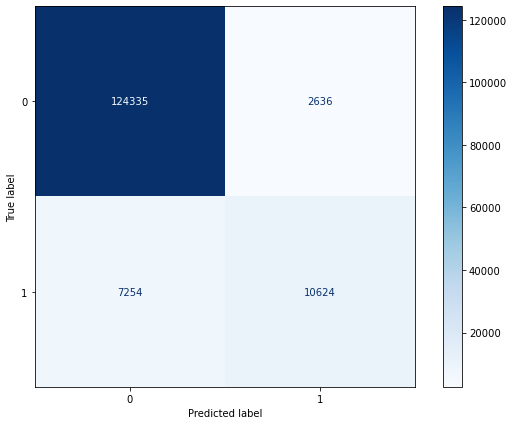

In [47]:
#plot the confusion matrix
plot_confusion_matrix(logreg_model, X_test_scaled, y_test, cmap='Blues');

Again, we can see that our model correctly predicted more data points for class 0 (**True Negative**). The **incorrect** predictions for Class 1 (**FN**) are higher than for Class 0 (**FP**). Even though we didn't have overfitting in our accuracy, we see overfitting in the confusion matrix as the **False Negatives** are higher than our **False Positive**. 

One way to fix this would be to add more features/variables or go back to our preprocessing stage and change our strategy on which features to select. 

- Adding more features:

    - For example adding **weather feature** (which needs to be imported from web for dates that the hearing took place. 
    
    - Adding 'keyword' **news feature** - what was on the news on that certain day (NLP and web scraping). 


- Update preprocessing selection:

    - For example we could only select years with higher than 5,000 cases or we could select top nationalities. Another option would be to do **forward selection** instead of using all variables at once. 
    

We could also run a Neural Network Model and control the stop point of the learning rate. 

These options could be future of work for this project. 

Next we will also look at classification report to view **precision, recall and f1-score** of our logistic regression model.

In [48]:
#look at classification report - precision and recall
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    126971
           1       0.80      0.59      0.68     17878

    accuracy                           0.93    144849
   macro avg       0.87      0.79      0.82    144849
weighted avg       0.93      0.93      0.93    144849



**Precision** is what percent of our model predictions were correct. We can see our model correctly predicted **80%** of class 1 and **94%** of class 0. 

Let's look at our precision this way:

- Of all asylee applicants that were predicted to be granted asylum (get accepted), how many / what percentage actually got accepted? **80%**

- In this case, there were 7,254 applicants who we predicted would not be granted asylum, however they were granted asylum. 

**Recall** is what percent of positives were correctly identified. We can see our model correctly identified **59%** of positives in class 1. 

Let's look at our recall this way:

- Of all applicants who were granted asylum (accepted), how many / what percentage were we able to correctly predict? **59%**

**f1-score** is the percentage of correct positive predictions. We can see that it's **68%** for class 1 and **96%** for class 0. 

Choosing the appropriate metric depends on the business objective. For our business objective, we would like to focus on higher precision. 

Why did we pick precision? Because the **false negative** in our case is more acceptable and tolerable than false positive. Meaning that it is easier for immigration attorneys to mistakenly tell their asylee clients they will get rejected when in actuality they will get accepted. It is harder for immigration attorneys to tell their clients mistakenly that their application will be accepted and asylum will be granted when in actuality it will not. Therefore, we will choose precision as our model evaluation metric.

Immigration attorneys would prefer to under promise and over deliver. Meaning that it is better to not give asylum applicants high hopes.

If immigration attorneys were to tell applicants they will get accepted but then the case actually gets rejected, then they have to deliver bad news. On the opposite if they tell applicants that their case will most likely get rejected but it is accepted then they will be delivering good news. 

Next we will look at the ROC Curve and AUC.

### ROC Curve and AUC

Next we will visualize our model's ROC curve to see how much it is capable of distinguishing between classes. 

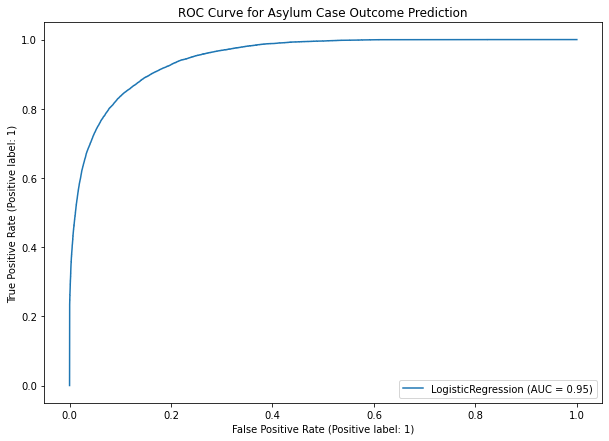

In [49]:
#import library
from sklearn.metrics import plot_roc_curve

#plot ROC curve
plot_roc_curve(logreg_model, X_test_scaled, y_test)
plt.title('ROC Curve for Asylum Case Outcome Prediction')
plt.show()

Our model's **AUC** score is **0.95**. Note that the higher the AUC score, the better our model is predicting class 0 as 0 and class 1 as 1. 

Also our model has a good measure of separability as our **AUC** score is closer to 1. This means that even with our imbalanced classes, our model is able to separate the two classes from one another. 

This is great as we might not need to use balancing methods such as downsampling, upsampling or SMOTE to balance our classes.

Next we will look at Decision Tree and Random Forest model. 

---

## Decision Tree & Random Forest

#### Decision Tree Model

We will start with a baseline simple vanilla model before optimizing the hyperparameters of our classifier.

Note that we will be using the scaled dataset, however decision trees are indifferent to scaling. Whether it's with Min-Max Scaler, Standard Scaler or Robust Scaler, decision tree models are indifferent to it. However as it's still best practice, we will use our remainder set (train+validation) that has been scaled with the MinMaxScaler().

In [50]:
#baseline decision tree model - import library
from sklearn.tree import DecisionTreeClassifier


#instantiate
baseline_dtree = DecisionTreeClassifier(random_state=1) #note max_depth default is set to none

#fit
baseline_dtree.fit(X_remainder_scaled, y_remainder)

#score
print(f'Accuracy on remainder set: {baseline_dtree.score(X_remainder_scaled, y_remainder)}')
print(f'Accuracy on test set: {baseline_dtree.score(X_test_scaled, y_test)}')

Accuracy on remainder set: 0.9999970412450441
Accuracy on test set: 0.9154774972557629


As expected we see some overfitting without the `max_depth` set. 

**Model Assessment** <br>
 
| Model   | Remainder Accuracy   | Test Accuracy|
|-------------|-------|----------|
| Baseline Decision Tree Model | 0.999997041 |0.915477497

<br>
<br>

Let's set `max_depth` to **3** (shallow tree) to see how our accuracy changes.

In [51]:
#decision tree model with max_depth added

#instantiate
dtree_model = DecisionTreeClassifier(max_depth=3, random_state=1)

#fit
dtree_model.fit(X_remainder_scaled, y_remainder)

#score
print(f'Accuracy on remainder set: {dtree_model.score(X_remainder_scaled, y_remainder)}')
print(f'Accuracy on test set: {dtree_model.score(X_test_scaled, y_test)}')

Accuracy on remainder set: 0.9041836795076632
Accuracy on test set: 0.9042934366133007


**Model Assessment** <br>
 
| Model   | Remainder Accuracy   | Test Accuracy|
|-------------|-------|----------|
| Baseline Decision Tree Model | 0.999997041 |0.915477497
| Shallow Decision Tree Model | 0.904183679 | 0.904293436

<br>

We can see that our model is no longer overfitting, however our remainder and test accuracy has dropped. Our next step would be to do some tuning and find the optimal maximum depth for our decision tree model. 

Let's plot our shallow tree and look at the features (decision nodes) it is using. This is to make sure one feature (decision node) is not being used more over the others  - it is like a sanity check for us. 

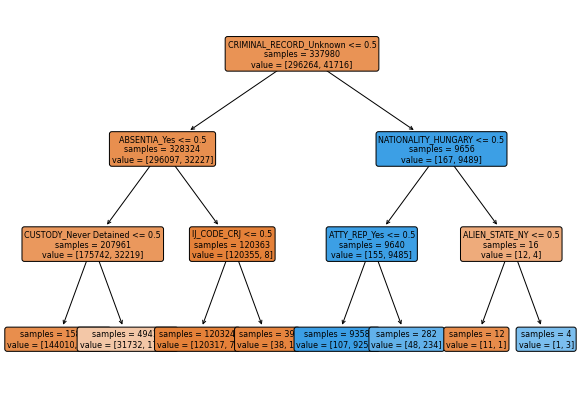

In [52]:
#plot the tree
from sklearn.tree import plot_tree
plot_tree(dtree_model, 
          feature_names=X_remainder.columns, 
          rounded=True,
          impurity=False,
          filled=True,
          fontsize=8);

We can confirm that the same feature is not being used in the decision nodes. 

We can see that our tree is using features such as `CRIMINAL_RECORD`, `ABSENTIA`, `ATTY_REP` and `CUSTODY` in its decision nodes. 

In the next section we will use our train and validation sets to find the optimal value for `max_depth` hyperparameter (optimize our decision tree hyperparameter).

In [53]:
#for loop for finding the optimal max_depth

train_accs = []
validation_accs = []
depth = range(1, 20)

for n in depth:

    # 1.instantiate 
    dtree_model3 = DecisionTreeClassifier(max_depth=n, random_state=1)

    # 2.fit (on the train set)
    dtree_model3.fit(X_train_scaled, y_train)

    # 3.score (on both train and validation sets)
    train_score = dtree_model3.score(X_train_scaled, y_train)
    validation_score = dtree_model3.score(X_validation_scaled, y_validation)
    
    #add these to the lists
    train_accs.append(train_score)
    validation_accs.append(validation_score)

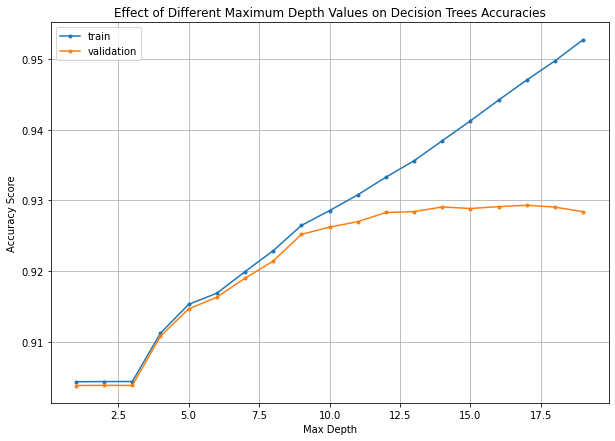

In [54]:
# Visualize
plt.figure()
plt.plot(range(1, 20), train_accs, label='train', marker='.')
plt.plot(range(1, 20), validation_accs, label='validation', marker='.')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Effect of Different Maximum Depth Values on Decision Trees Accuracies')
plt.legend()
plt.grid()
plt.show()

From the above visualization we can see the optimal max_depth is where our validation accuracy score is at it's highest and the distance from the validation accuracy to our train accuracy isn't much for it to be overfitting. The optimal `max_depth` is **9**. 

Let's also look at the values in a table to be sure.

In [55]:
# Check the accuracies
pd.DataFrame({'max depth': depth, 'train accuracy': train_accs, 'validation accuracy': validation_accs})

,max depth,train accuracy,validation accuracy
0,1,0.904314,0.903781
1,2,0.904339,0.903801
2,3,0.904343,0.903791
3,4,0.911208,0.910764
4,5,0.915282,0.914640
5,6,0.916859,0.916287
6,7,0.919919,0.918979
7,8,0.922886,0.921415
8,9,0.926462,0.925193
9,10,0.928567,0.926228


Great, we can confirm that max_depth **9** is our optimal value and we can now refit our model. 

In [56]:
#fit on the rem and score rem and test

#instantiate
dtree_model3 = DecisionTreeClassifier(max_depth=9, random_state=1)

#fit
dtree_model3.fit(X_remainder_scaled, y_remainder)

#score
print(f'Accuracy on remainder set: {dtree_model3.score(X_remainder_scaled, y_remainder)}')
print(f'Accuracy on test set: {dtree_model3.score(X_test_scaled, y_test)}')

Accuracy on remainder set: 0.9260163323273567
Accuracy on test set: 0.9247906440500107


**Model Assessment** <br>
 
| Model   | Remainder Accuracy   | Test Accuracy|
|-------------|-------|----------|
| Baseline Decision Tree Model | 0.999997041 |0.915477497
| Shallow Decision Tree Model | 0.904183679 | 0.904293436
| **Optimized Decision Tree Model** | **0.926016332** |**0.924790644**

<br>

Great, with the optimal `max_depth` value we were able to get a better test accuracy and also our model is not overfitting. 

We should note that decision trees are sensitive to minor changes in data and can introduce bias. One way to fix this is to use ensemble method such as random forests which we will do later in this notebook.  

Let's evaluate our decision tree by looking at our best performing model's confusion matrix. 

Note that in the below model evaluation we will not go into as much detail like we did for our **Logistic Regression Model** but still would like to see how our last decision tree model did compared to the logistic regression model. 

Let's evaluate our optimized decision tree model. 

#### Model Evaluation

In [57]:
#get class predictions
y_pred = dtree_model3.predict(X_test_scaled)

#generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Class 0", "True Class 1"]
)

display(cf_df)

,Predicted Class 0,Predicted Class 1
True Class 0,124068,2903
True Class 1,7991,9887


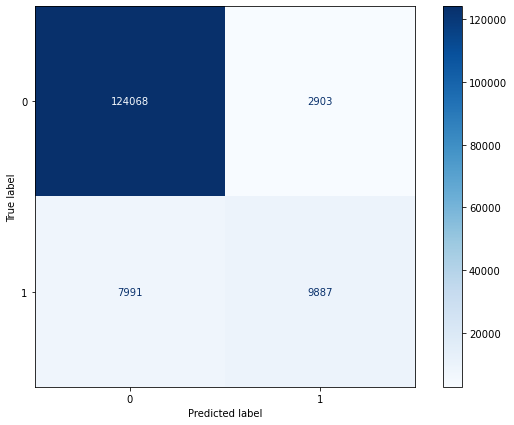

In [58]:
#plot the confusion matrix
plot_confusion_matrix(dtree_model3, X_test_scaled, y_test, cmap='Blues');

Similar to our logistic regression we see overfitting as our **False Negative** is higher than our **False Positive**. 

Let's look at our classification report. 

In [59]:
#look at classification report - precision and recall
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    126971
           1       0.77      0.55      0.64     17878

    accuracy                           0.92    144849
   macro avg       0.86      0.77      0.80    144849
weighted avg       0.92      0.92      0.92    144849



**Precision** is what percent of our model predictions were correct. We can see our model correctly predicted **77%** of class 1 and **94%** of class 0. 

Let's look at our precision this way:

- Of all asylee applicants that were predicted to be granted asylum (get accepted), how many actually got accepted? **77%**

**Recall** is what percent of positives were correctly identified. We can see our model correctly identified **55%** of positives in class 1 and **98%** in class 0. 

Let's look at our recall this way:

- Of all applicants who were granted asylum (accepted), how many were we able to correctly predict? **57%**

**f1-score** is the percentage of correct positive predictions. We can see that it's **64%** for class 1 and **96%** for class 0. 

Note that our **recall is lower** in our decision tree model vs our logistic regression model and our **precision is also lower**. 

Next we will look at **Random Forest Model**.

#### Random Forest Model

Random Forest is an ensemble of decision tress. The approach of random forest is to train several trees and average the result of each one. To control the number of trees in our random forest model we will use `n_estimators` hyperparameter. 

Note that each tree in the random forest has a different decision boundary and each overfit to the data which will disappear when we average them.

Again, the random forest performs better than the average performance of the trees inside it, and generally performs better than the individual decision tree models.

Let's get started on our model. 

We can loop over a range for the number of estimators and evaluate the model on both the train and validation set. We will not set `max_depth` yet and expect to see some overfitting due to this. 

In [60]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_range = range(1, 60)

results = pd.DataFrame()
for n_est in n_estimators_range:
    my_rf = RandomForestClassifier(n_estimators=n_est, random_state=1)

    my_rf.fit(X_train_scaled, y_train)
    
    train_score = my_rf.score(X_train_scaled, y_train)
    validation_score = my_rf.score(X_validation_scaled, y_validation)
    
    results = results.append(
        {"n_estimators": n_est, "train": train_score, "validation": validation_score},
        ignore_index=True
    )
    
    print(n_est, end="\r")

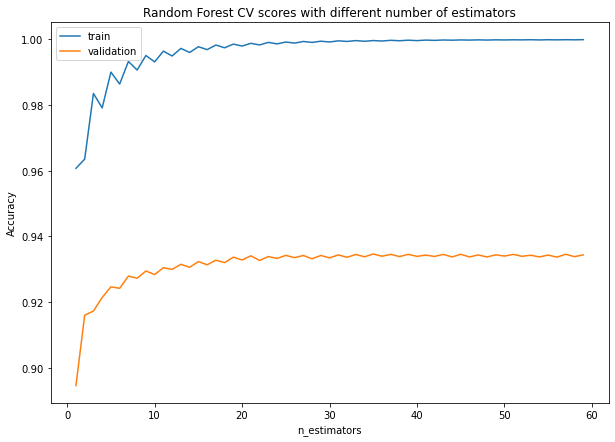

In [61]:
plt.figure(figsize=(10, 7))
results.plot(x="n_estimators", y=["train", "validation"], kind="line", ax=plt.gca())
plt.legend()
plt.title("Random Forest CV scores with different number of estimators")
plt.ylabel("Accuracy")
plt.show()

It is clear that all the models were overfitting quite strongly. The training accuracy reached almost 100% around 40 estimators while the test accuracy hovered around 93%.


We now repeat the above step with setting `max_depth` to 9 - this is expected to limit the models capacity and address the overfitting.

In [62]:
n_estimators_range = range(1, 60)

results = pd.DataFrame()
for n_est in n_estimators_range:
    my_rf = RandomForestClassifier(n_estimators=n_est, max_depth=9, random_state=1)

    my_rf.fit(X_train_scaled, y_train)
    
    train_score = my_rf.score(X_train_scaled, y_train)
    validation_score = my_rf.score(X_validation_scaled, y_validation)
    
    results = results.append(
        {"n_estimators": n_est, "train": train_score, "validation": validation_score},
        ignore_index=True
    )
    
    print(n_est, end="\r")

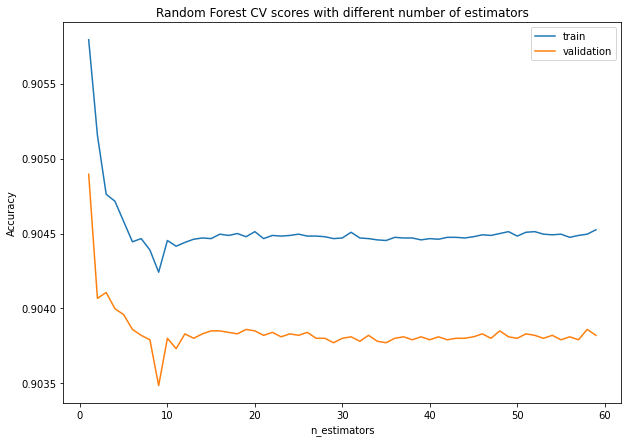

In [63]:
plt.figure(figsize=(10, 7))
results.plot(x="n_estimators", y=["train", "validation"], kind="line", ax=plt.gca())
plt.legend()
plt.title("Random Forest CV scores with different number of estimators")
plt.ylabel("Accuracy")
plt.show()

We can see that both the training and validation scores are lower. 

Let's zoom in our graph above to better see the trend lines. 

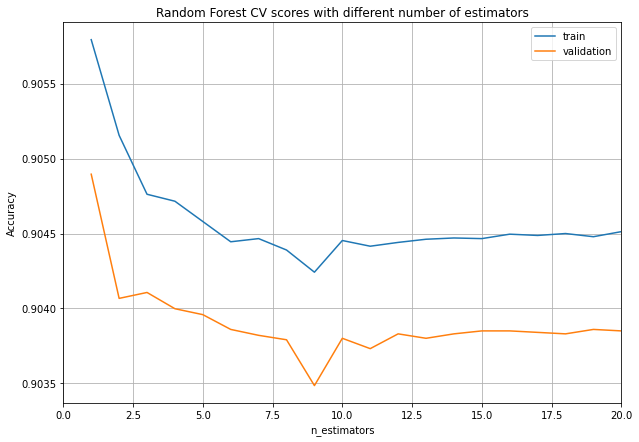

In [64]:
#plot to zoom in (between 0 and 20)
plt.figure(figsize=(10, 7))
results.plot(x="n_estimators", y=["train", "validation"], kind="line", ax=plt.gca())
plt.xlim(0, 20)
plt.legend()
plt.title("Random Forest CV scores with different number of estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

Great, we have a better visualization and can see that at n_estimator 3 we have the highest validation accuracy and it is closest to our training accuracy.  

We choose n_estimators of **3**. 

Next we will score our remainder and test sets with the n_estimators of ** ** and look at our accuracy. 

In [65]:
#instantiate
my_rf = RandomForestClassifier(n_estimators=3, max_depth=9, random_state=1)

#fit
my_rf.fit(X_remainder_scaled, y_remainder)

#score
#score
print(f'Accuracy on remainder set: {my_rf.score(X_remainder_scaled, y_remainder)}')
print(f'Accuracy on test set: {my_rf.score(X_test_scaled, y_test)}')

Accuracy on remainder set: 0.9060536126398012
Accuracy on test set: 0.9059158157805715


**Model Assessment** <br>
 
| Model   | Remainder Accuracy   | Test Accuracy|
|-------------|-------|----------|
| Baseline Decision Tree Model | 0.999997041 |0.915477497
| Shallow Decision Tree Model | 0.904183679 | 0.904293436
| Optimized Decision Tree Model | 0.933058169 |0.928636027
| Random Forest Model| 0.906053612 | 0.905915815

<br>

The test accuracy on the random forest model is similar to our shallow decision tree model. Overall the score is still good and we are not overfitting. 

Random Forest models also give us feature importance that are useful in interpreting the results. 

Let's find the most important features in our model. 

In [66]:
# Find the most important features
feature_df = pd.DataFrame(
    {"feature_importance": my_rf.feature_importances_},
    index=X_remainder.columns
)

feature_df

,feature_importance
BIRTHDATE_MONTH,0.000293
AGE,0.000192
DATE_OF_ENTRY_DAY,0.000346
DATE_OF_ENTRY_MONTH,0.000224
DATE_OF_ENTRY_YEAR,0.023545
...,...
IJ_CODE_ZZD,0.000000
IJ_CODE_ao,0.000000
IJ_CODE_cep,0.000000
IJ_CODE_jlr,0.000000


In [67]:
#sort values
feature_df.sort_values(by='feature_importance', ascending=False).head(10)

,feature_importance
CASE_DESCRIPTION_Removal,0.641612
CASE_DESCRIPTION_Reasonable Fear Case,0.088463
ABSENTIA_Yes,0.080979
ATTY_REP_Yes,0.056621
DATE_OF_ENTRY_YEAR,0.023545
ALIEN_STATE_HI,0.009839
HEARING_STATE_HI,0.009037
CASE_DESCRIPTION_Deportation,0.008876
HEARING_STATE_NY,0.007031
NATIONALITY_ERITREA,0.006221


We can see that `CASE_DESCRIPTION_Removal` has high importance in our model. We can also see similar features that were top predictors for accepted and rejected outcomes in our logistic regression model are present here as well. 

For example `CASE_DESCRIPTION_Credible Fear Review`, `CASE_DESCRIPTION_Credible Fear Case` are important features in our random forest model and were also high predictive features for acceptance in our logistic regression model. 

Also `ABSENTIA_Yes`, `DATE_OF_ENTRY_YEAR` and `NATIONALITY_HONDURAS` are important features in our random forest model and were high predictive features for rejection in our logistic regression model. 

We can see that different models are using some of the same features in predicting outcomes. 

Let's evaluate our random forest model next. Again we will not go into as much detail as we will evaluate the best performing model overall in greater detail in the final notebook. This is mainly to give us an idea on how well our model is doing compared to the others we have ran so far. 

### Model Evaluation - Random Forest

In [68]:
#get class predictions
y_pred = my_rf.predict(X_test_scaled)

#generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Class 0", "True Class 1"]
)

display(cf_df)

,Predicted Class 0,Predicted Class 1
True Class 0,126814,157
True Class 1,13471,4407


From the above confusion matrix we can see that our model is overfitting as the number of **False Negative** is much higher(**13,471**) than the number of **False Positive (157)**.

Let's plot the confusion matrix next to better see the above results. 

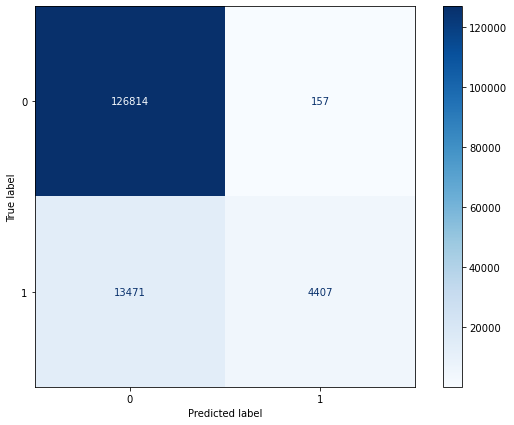

In [69]:
#plot the confusion matrix
plot_confusion_matrix(my_rf, X_test_scaled, y_test, cmap='Blues');

Again we will mention that the number of **False Negatives** are higher than our **False Positives**.

Let's look at our classification report.

In [70]:
#look at classification report - precision and recall
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95    126971
           1       0.97      0.25      0.39     17878

    accuracy                           0.91    144849
   macro avg       0.93      0.62      0.67    144849
weighted avg       0.91      0.91      0.88    144849



We have a much higher precision however our recall has dropped a lot compared to other models we have done so far. 

Next, we will look at a supplementary model which we have done only for comparison. 

---

## Supplementary Model - K-Nearest Neighbor (KNN)

In this section we will employ a K-Nearest Neighbor classifier.

First we will take a subset to reduce the run-time of our model. 

Let's start by looking at our dataset first. 

In [71]:
#check original data before taking subset
df_asylum.head()

,DECISION,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR,NATIONALITY_ALBANIA,NATIONALITY_ALGERIA,NATIONALITY_ANGOLA,NATIONALITY_ANGUILLA,NATIONALITY_ANTIGUA AND BARBUDA,NATIONALITY_ARGENTINA,NATIONALITY_ARMENIA,NATIONALITY_ARUBA,NATIONALITY_AUSTRALIA,NATIONALITY_AUSTRIA,NATIONALITY_AZERBAIJAN,NATIONALITY_BAHAMAS,NATIONALITY_BAHRAIN,NATIONALITY_BANGLADESH,NATIONALITY_BARBADOS,NATIONALITY_BE REMOVED FROM THE UNITED STATES,NATIONALITY_BELARUS,NATIONALITY_BELGIUM,NATIONALITY_BELIZE,NATIONALITY_BENIN,NATIONALITY_BERMUDA,NATIONALITY_BHUTAN,NATIONALITY_BOLIVIA,NATIONALITY_BOSNIA-HERZEGOVINA,NATIONALITY_BOTSWANA,NATIONALITY_BRAZIL,NATIONALITY_BRITISH VIRGIN ISLANDS,NATIONALITY_BRUNEI,NATIONALITY_BULGARIA,NATIONALITY_BURKINA FASO,NATIONALITY_BURMA (MYANMAR),NATIONALITY_BURUNDI,NATIONALITY_BYELORUSSIA (BELARUS),NATIONALITY_CAMBODIA,NATIONALITY_CAMEROON,NATIONALITY_CANADA,NATIONALITY_CAPE VERDE,NATIONALITY_CAYMAN ISLANDS,NATIONALITY_CENTRAL AFRICAN REPUBLIC,NATIONALITY_CHAD,NATIONALITY_CHILE,NATIONALITY_CHINA,NATIONALITY_COLOMBIA,NATIONALITY_COMORO ISLANDS,NATIONALITY_CONGO,NATIONALITY_COSTA RICA,NATIONALITY_CROATIA,NATIONALITY_CUBA,NATIONALITY_CYPRUS,NATIONALITY_CZECH REPUBLIC,NATIONALITY_CZECHOSLOVAKIA,NATIONALITY_DEMOCRATIC REPUBLIC OF CONGO,NATIONALITY_DENMARK,NATIONALITY_DJIBOUTI,NATIONALITY_DOMINICA,NATIONALITY_DOMINICAN REPUBLIC,NATIONALITY_EAST GERMANY,NATIONALITY_EAST TIMOR,NATIONALITY_ECUADOR,NATIONALITY_EGYPT,NATIONALITY_EL SALVADOR,NATIONALITY_EQUATORIAL GUINEA,NATIONALITY_ERITREA,NATIONALITY_ESTONIA,NATIONALITY_ETHIOPIA,NATIONALITY_FEDERATED STATES OF MICRONESIA,NATIONALITY_FIJI,NATIONALITY_FINLAND,NATIONALITY_FRANCE,NATIONALITY_FRENCH GUIANA,NATIONALITY_FRENCH POLYNESIA,NATIONALITY_FRENCH WEST INDIES,NATIONALITY_GABON,NATIONALITY_GAMBIA,NATIONALITY_GAZA STRIP,NATIONALITY_GEORGIA,NATIONALITY_GERMANY,NATIONALITY_GHANA,NATIONALITY_GIBRALTAR,NATIONALITY_GREECE,NATIONALITY_GRENADA,NATIONALITY_GUADELOUPE,NATIONALITY_GUATEMALA,NATIONALITY_GUINEA,NATIONALITY_GUINEA BISSAU,NATIONALITY_GUYANA,NATIONALITY_HAITI,NATIONALITY_HOLLAND,NATIONALITY_HONDURAS,NATIONALITY_HONG KONG,NATIONALITY_HUNGARY,NATIONALITY_ICELAND,NATIONALITY_INDIA,NATIONALITY_INDONESIA,NATIONALITY_IRAN,NATIONALITY_IRAQ,NATIONALITY_IRELAND,NATIONALITY_ISRAEL,NATIONALITY_ITALY,NATIONALITY_IVORY COAST (COTE D'IVOIRE),NATIONALITY_JAMAICA,NATIONALITY_JAPAN,NATIONALITY_JORDAN,NATIONALITY_KAMPUCHEA,NATIONALITY_KAZAKHSTAN,NATIONALITY_KENYA,NATIONALITY_KIRGHIZIA (KYRGYZSTAN),NATIONALITY_KOSOVO,NATIONALITY_KUWAIT,NATIONALITY_LAOS,NATIONALITY_LATVIA,NATIONALITY_LEBANON,NATIONALITY_LESOTHO,NATIONALITY_LIBERIA,NATIONALITY_LIBYA,NATIONALITY_LITHUANIA,NATIONALITY_LUXEMBOURG,NATIONALITY_MACAU,NATIONALITY_MACEDONIA,NATIONALITY_MADAGASCAR,NATIONALITY_MALAWI,NATIONALITY_MALAYSIA,NATIONALITY_MALI,NATIONALITY_MALTA,NATIONALITY_MARTINIQUE,NATIONALITY_MAURITANIA,NATIONALITY_MAURITIUS,NATIONALITY_MEXICO,NATIONALITY_MIDWAY ISLANDS,NATIONALITY_MOLDAVIA (MOLDOVA),NATIONALITY_MONACO,NATIONALITY_MONGOLIA,NATIONALITY_MONTENEGRO,NATIONALITY_MONTSERRAT,NATIONALITY_MOROCCO,NATIONALITY_MOZAMBIQUE,NATIONALITY_NAMIBIA,NATIONALITY_NEPAL,NATIONALITY_NETHERLANDS,NATIONALITY_NETHERLANDS ANTILLES,NATIONALITY_NEW ZEALAND,NATIONALITY_NICARAGUA,NATIONALITY_NIGER,NATIONALITY_NIGERIA,NATIONALITY_NORTH KOREA,NATIONALITY_NORWAY,NATIONALITY_OMAN,NATIONALITY_PAKISTAN,NATIONALITY_PALESTINE,NATIONALITY_PANAMA,NATIONALITY_PAPUA NEW GUINEA,NATIONALITY_PARAGUAY,NATIONALITY_PEOPLE'S REPUBLIC OF BENIN,NATIONALITY_PERU,NATIONALITY_PHILIPPINES,NATIONALITY_PITCAIRN ISLANDS,NATIONALITY_POLAND,NATIONALITY_PORTUGAL,NATIONALITY_QATAR,NATIONALITY_ROMANIA,NATIONALITY_RUSSIA,NATIONALITY_RWANDA,NATIONALITY_SAMOA,NATIONALITY_SAO TOME AND PRINCIPE,NATIONALITY_SAUDI ARABIA,NATIONALITY_SENEGAL,NATIONALITY_SERBIA MONTENEGRO,NATIONALITY_SEYCHELLES,NATIONALITY_SIERRA LEONE,NATIONALITY_SINGAPORE,NATIONALITY_SLOVAK REPUBLIC,NATI

Now we will check the class distribution since we want to compare it to our subset and make sure we have kept the same class distribution. 

In [72]:
#check class distribution
df_asylum['DECISION'].value_counts(normalize=True)*100

0    87.657328
1    12.342672
Name: DECISION, dtype: float64

Next we will take a look at the shape of our dataset and take a 10% sample as our subset. 

In [73]:
#check shape prior to subset
df_asylum.shape

(482829, 1037)

In [74]:
# 10% of original datast
482843*0.1

48284.3

In [75]:
#take 10% sample size and set random state
df_subset = df_asylum.sample(frac=0.1, random_state=1)

In [76]:
#check subset shape
df_subset.shape

(48283, 1037)

Great, we have successfully sampled 10% of our dataset as our subset to work with from now onward. Let's reset our index and look at the class distribution after taking the subset.

In [77]:
#reset index - drop the old index
df_subset = df_subset.reset_index(drop=True)

In [78]:
#check class distribution
df_subset['DECISION'].value_counts(normalize=True)*100

0    87.567053
1    12.432947
Name: DECISION, dtype: float64

Perfect, we have kept the same class distribution in our subset.

Next we will define our features (X) and targe (y) and check the shapes.

In [79]:
#define X and y for the subset
X_subset = df_subset.drop(columns='DECISION')
y_subset = df_subset['DECISION']

In [80]:
#check shape for both X and y
print(f'Shape of X_subset is : {X_subset.shape}')
print(f'Shape of y_subset is : {y_subset.shape}')

Shape of X_subset is : (48283, 1036)
Shape of y_subset is : (48283,)


In [81]:
#check X_subset
X_subset.head()

,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR,NATIONALITY_ALBANIA,NATIONALITY_ALGERIA,NATIONALITY_ANGOLA,NATIONALITY_ANGUILLA,NATIONALITY_ANTIGUA AND BARBUDA,NATIONALITY_ARGENTINA,NATIONALITY_ARMENIA,NATIONALITY_ARUBA,NATIONALITY_AUSTRALIA,NATIONALITY_AUSTRIA,NATIONALITY_AZERBAIJAN,NATIONALITY_BAHAMAS,NATIONALITY_BAHRAIN,NATIONALITY_BANGLADESH,NATIONALITY_BARBADOS,NATIONALITY_BE REMOVED FROM THE UNITED STATES,NATIONALITY_BELARUS,NATIONALITY_BELGIUM,NATIONALITY_BELIZE,NATIONALITY_BENIN,NATIONALITY_BERMUDA,NATIONALITY_BHUTAN,NATIONALITY_BOLIVIA,NATIONALITY_BOSNIA-HERZEGOVINA,NATIONALITY_BOTSWANA,NATIONALITY_BRAZIL,NATIONALITY_BRITISH VIRGIN ISLANDS,NATIONALITY_BRUNEI,NATIONALITY_BULGARIA,NATIONALITY_BURKINA FASO,NATIONALITY_BURMA (MYANMAR),NATIONALITY_BURUNDI,NATIONALITY_BYELORUSSIA (BELARUS),NATIONALITY_CAMBODIA,NATIONALITY_CAMEROON,NATIONALITY_CANADA,NATIONALITY_CAPE VERDE,NATIONALITY_CAYMAN ISLANDS,NATIONALITY_CENTRAL AFRICAN REPUBLIC,NATIONALITY_CHAD,NATIONALITY_CHILE,NATIONALITY_CHINA,NATIONALITY_COLOMBIA,NATIONALITY_COMORO ISLANDS,NATIONALITY_CONGO,NATIONALITY_COSTA RICA,NATIONALITY_CROATIA,NATIONALITY_CUBA,NATIONALITY_CYPRUS,NATIONALITY_CZECH REPUBLIC,NATIONALITY_CZECHOSLOVAKIA,NATIONALITY_DEMOCRATIC REPUBLIC OF CONGO,NATIONALITY_DENMARK,NATIONALITY_DJIBOUTI,NATIONALITY_DOMINICA,NATIONALITY_DOMINICAN REPUBLIC,NATIONALITY_EAST GERMANY,NATIONALITY_EAST TIMOR,NATIONALITY_ECUADOR,NATIONALITY_EGYPT,NATIONALITY_EL SALVADOR,NATIONALITY_EQUATORIAL GUINEA,NATIONALITY_ERITREA,NATIONALITY_ESTONIA,NATIONALITY_ETHIOPIA,NATIONALITY_FEDERATED STATES OF MICRONESIA,NATIONALITY_FIJI,NATIONALITY_FINLAND,NATIONALITY_FRANCE,NATIONALITY_FRENCH GUIANA,NATIONALITY_FRENCH POLYNESIA,NATIONALITY_FRENCH WEST INDIES,NATIONALITY_GABON,NATIONALITY_GAMBIA,NATIONALITY_GAZA STRIP,NATIONALITY_GEORGIA,NATIONALITY_GERMANY,NATIONALITY_GHANA,NATIONALITY_GIBRALTAR,NATIONALITY_GREECE,NATIONALITY_GRENADA,NATIONALITY_GUADELOUPE,NATIONALITY_GUATEMALA,NATIONALITY_GUINEA,NATIONALITY_GUINEA BISSAU,NATIONALITY_GUYANA,NATIONALITY_HAITI,NATIONALITY_HOLLAND,NATIONALITY_HONDURAS,NATIONALITY_HONG KONG,NATIONALITY_HUNGARY,NATIONALITY_ICELAND,NATIONALITY_INDIA,NATIONALITY_INDONESIA,NATIONALITY_IRAN,NATIONALITY_IRAQ,NATIONALITY_IRELAND,NATIONALITY_ISRAEL,NATIONALITY_ITALY,NATIONALITY_IVORY COAST (COTE D'IVOIRE),NATIONALITY_JAMAICA,NATIONALITY_JAPAN,NATIONALITY_JORDAN,NATIONALITY_KAMPUCHEA,NATIONALITY_KAZAKHSTAN,NATIONALITY_KENYA,NATIONALITY_KIRGHIZIA (KYRGYZSTAN),NATIONALITY_KOSOVO,NATIONALITY_KUWAIT,NATIONALITY_LAOS,NATIONALITY_LATVIA,NATIONALITY_LEBANON,NATIONALITY_LESOTHO,NATIONALITY_LIBERIA,NATIONALITY_LIBYA,NATIONALITY_LITHUANIA,NATIONALITY_LUXEMBOURG,NATIONALITY_MACAU,NATIONALITY_MACEDONIA,NATIONALITY_MADAGASCAR,NATIONALITY_MALAWI,NATIONALITY_MALAYSIA,NATIONALITY_MALI,NATIONALITY_MALTA,NATIONALITY_MARTINIQUE,NATIONALITY_MAURITANIA,NATIONALITY_MAURITIUS,NATIONALITY_MEXICO,NATIONALITY_MIDWAY ISLANDS,NATIONALITY_MOLDAVIA (MOLDOVA),NATIONALITY_MONACO,NATIONALITY_MONGOLIA,NATIONALITY_MONTENEGRO,NATIONALITY_MONTSERRAT,NATIONALITY_MOROCCO,NATIONALITY_MOZAMBIQUE,NATIONALITY_NAMIBIA,NATIONALITY_NEPAL,NATIONALITY_NETHERLANDS,NATIONALITY_NETHERLANDS ANTILLES,NATIONALITY_NEW ZEALAND,NATIONALITY_NICARAGUA,NATIONALITY_NIGER,NATIONALITY_NIGERIA,NATIONALITY_NORTH KOREA,NATIONALITY_NORWAY,NATIONALITY_OMAN,NATIONALITY_PAKISTAN,NATIONALITY_PALESTINE,NATIONALITY_PANAMA,NATIONALITY_PAPUA NEW GUINEA,NATIONALITY_PARAGUAY,NATIONALITY_PEOPLE'S REPUBLIC OF BENIN,NATIONALITY_PERU,NATIONALITY_PHILIPPINES,NATIONALITY_PITCAIRN ISLANDS,NATIONALITY_POLAND,NATIONALITY_PORTUGAL,NATIONALITY_QATAR,NATIONALITY_ROMANIA,NATIONALITY_RUSSIA,NATIONALITY_RWANDA,NATIONALITY_SAMOA,NATIONALITY_SAO TOME AND PRINCIPE,NATIONALITY_SAUDI ARABIA,NATIONALITY_SENEGAL,NATIONALITY_SERBIA MONTENEGRO,NATIONALITY_SEYCHELLES,NATIONALITY_SIERRA LEONE,NATIONALITY_SINGAPORE,NATIONALITY_SLOVAK REPUBLIC,NATIONALITY_S

In [82]:
#check y_subset 
y_subset

0        1
1        0
2        0
3        0
4        0
        ..
48278    0
48279    0
48280    0
48281    1
48282    0
Name: DECISION, Length: 48283, dtype: int64

Next, we will split our subset X and y into remainder and test sets and check their shape. 

In [83]:
#split our X_subset and y_subset into remainder (train + validation) and test sets
X_sub_remainder, X_sub_test, y_sub_remainder, y_sub_test = train_test_split(X_subset, y_subset, test_size=0.30, random_state=1, stratify=y_subset)

In [84]:
#check shape for X_sub_remainder and y_sub_remainder
print(f'Shape of X_sub_remainder set: {X_sub_remainder.shape}')
print(f'Shape of y_sub_remainder set: {y_sub_remainder.shape}')

Shape of X_sub_remainder set: (33798, 1036)
Shape of y_sub_remainder set: (33798,)


In [85]:
#check shape for X_test and y_test
print(f'Shape of X_sub_test set: {X_sub_test.shape}')
print(f'Shape of y_sub_test set: {y_sub_test.shape}')

Shape of X_sub_test set: (14485, 1036)
Shape of y_sub_test set: (14485,)


Great, now that we have our remainder (train + validation) set and test set we can scale and run a basic KNN model.

The `MinMaxScaler()` is a good option for KNN models as they are distance-based and this scaler retains the original distribution in place (on a scale from 0 to 1).

Let's scale our subsets and build a baseline (simple vanilla) model to see the accuracy and adjust/tune our hyperparameters from there.

In [86]:
#MinMax Scaler

#instantiate
scaler = MinMaxScaler()

#fit  - on remiander set
scaler.fit(X_sub_remainder)

#transform - on both remainder and test set
X_sub_remainder_s = scaler.transform(X_sub_remainder)
X_sub_test_s = scaler.transform(X_sub_test)

Next, we will run our baseline KNN model. Note that KNN model does not have random_state. 

In [87]:
#baseline KNN model - note that random_state cannot be set for KNN models
from sklearn.neighbors import KNeighborsClassifier

#instantiate
baseline_knn = KNeighborsClassifier() #note default n-neighbors is 5 and also KNN does not have random_state

#fit
baseline_knn.fit(X_sub_remainder_s, y_sub_remainder)

#score
print(f'Accuracy on remainder set: {baseline_knn.score(X_sub_remainder_s, y_sub_remainder)}')
print(f'Accuracy on test set: {baseline_knn.score(X_sub_test_s, y_sub_test)}')

Accuracy on remainder set: 0.9378957334753536
Accuracy on test set: 0.9168104936140835


**KNN Model Assessment** <br>
 
| Model   | Remainder Accuracy   | Test Accuracy|
|-------------|-------|----------|
| Baseline KNN Model | 0.937895733 |0.916810493

Our baseline KNN model is slightly overfitting. We can find the optimal n_neighbor hyperparameter and re-run our model to see if the performance gets any better. 

To do so we will use a train and validation set. Let's split our remainder set into train and validation.

In [88]:
#split the remainder set into train and validation sets
X_sub_train, X_sub_validation, y_sub_train, y_sub_validation = train_test_split(X_sub_remainder, y_sub_remainder, test_size=0.30, random_state=1, stratify=y_sub_remainder)

#print info on how the data has been split
print(f'The train set has {len(X_sub_train)} data points.')
print(f'The validation set has {len(X_sub_validation)} data points.')

The train set has 23658 data points.
The validation set has 10140 data points.


In [89]:
#check shape 
print(f'Shape of test set: {X_sub_test.shape}')
print(f'Shape of validation set: {X_sub_validation.shape}')
print(f'Shape of train set: {X_sub_train.shape}')

Shape of test set: (14485, 1036)
Shape of validation set: (10140, 1036)
Shape of train set: (23658, 1036)


As always, let's check the class distribution.

In [90]:
print('Proportions in remainder set:')
print(y_sub_remainder.value_counts()/len(y_sub_remainder), '\n')

print('Proportions in test set:')
print(y_sub_test.value_counts()/len(y_sub_test), '\n')

print('Proportions in train set:')
print(y_sub_train.value_counts()/len(y_sub_train), '\n')

print('Proportions in validation set:')
print(y_sub_validation.value_counts()/len(y_sub_validation), '\n')

Proportions in remainder set:
0    0.875673
1    0.124327
Name: DECISION, dtype: float64 

Proportions in test set:
0    0.875664
1    0.124336
Name: DECISION, dtype: float64 

Proportions in train set:
0    0.875687
1    0.124313
Name: DECISION, dtype: float64 

Proportions in validation set:
0    0.875641
1    0.124359
Name: DECISION, dtype: float64 



Great, all looks good with our class distirbution.

Next we will scale our train and transform our validation set.

In [91]:
#scale X_sub_train and X_sub_validation

#MinMax Scaler

#instantiate
scaler = MinMaxScaler()

#fit - only the train set
scaler.fit(X_sub_train)

#transform - both train and validation set
X_sub_train_s = scaler.transform(X_sub_train)
X_sub_validation_s = scaler.transform(X_sub_validation)

Next, we will find an optimal value for K in our KNN model.

In [92]:
#KNN

knn_validation_scores = []
knn_train_scores = []

neighbors = range(1, 75, 5)   

for k in neighbors:
    
    #instantiate
    knn_model = KNeighborsClassifier(n_neighbors=k)
    #fit
    knn_model.fit(X_sub_train_s, y_sub_train)
    #score
    knn_train_scores.append(knn_model.score(X_sub_train_s, y_sub_train))
    knn_validation_scores.append(knn_model.score(X_sub_validation_s, y_sub_validation))

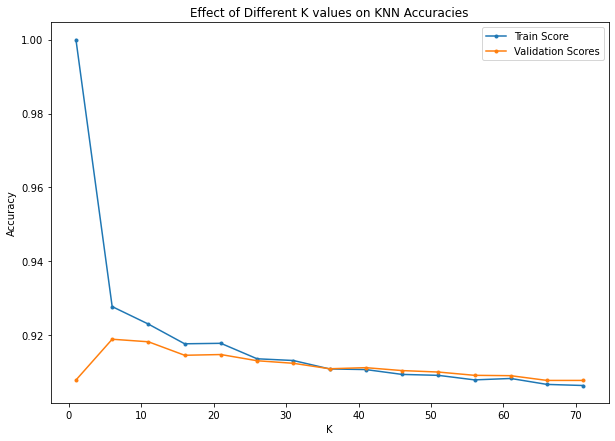

In [93]:
plt.figure(figsize=(10,7))
plt.plot(neighbors, knn_train_scores,label="Train Score",marker='.')
plt.plot(neighbors, knn_validation_scores,label="Validation Scores",marker='.')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Effect of Different K values on KNN Accuracies')
plt.legend()
plt.show()

From the above graph we can see that at around K value of ~11, our validation score is at it's highest and there is no overfitting.

Great, now that we have our optimal K value, let's refit our model and look at the accuracy score.

In [94]:
#fit on remainder and test sets
#instantiate
knn_model = KNeighborsClassifier(n_neighbors=11)

#fit
knn_model.fit(X_sub_remainder_s, y_sub_remainder)

#score
print(f'Accuracy on remainder set: {knn_model.score(X_sub_remainder_s, y_sub_remainder)}')
print(f'Accuracy on test set: {knn_model.score(X_sub_test_s, y_sub_test)}')

Accuracy on remainder set: 0.9278359666252441
Accuracy on test set: 0.9170866413531239


**KNN Model Assessment** <br>
 
| Model   | Remainder Accuracy   | Test Accuracy|
|-------------|-------|----------|
| Baseline KNN Model | 0.937895733 |0.916810493
| Optimized KNN Model | 0.927835966|0.917086641

We are no longer overfitting as the remainder accuracy has dropped and the test accuracy has stayed the same. 

Let's evaluate our KNN model by looking at the confusion matrix. 

Note that this is a supplementary model and we will not go into too much detail like we did with our logistic regression model as so far that is our best performing model.

#### Model Evaluation

Let's look at the confusion matrix for our KNN model. 

In [95]:
#get class predictions
y_sub_pred = knn_model.predict(X_sub_test_s)

#generate confusion matrix
cf_matrix = confusion_matrix(y_sub_test, y_sub_pred)

#label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Class 0", "True Class 1"]
)

display(cf_df)

,Predicted Class 0,Predicted Class 1
True Class 0,12524,160
True Class 1,1041,760


We can see overfitting as the **False Negatives** are higher than **False Positives**. 

Let's plot the confusion matrix. 

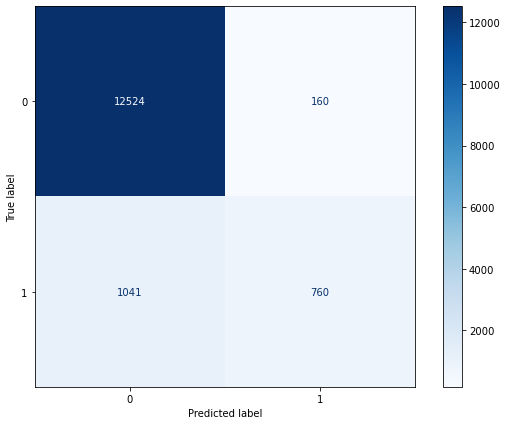

In [96]:
#plot the confusion matrix
plot_confusion_matrix(knn_model, X_sub_test_s, y_sub_test, cmap='Blues');

Let's look at the classification report to see how our precision and recall are compared to all previous models we tried in this notebook. 

In [97]:
#look at classification report - precision and recall
report = classification_report(y_sub_test, y_sub_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     12684
           1       0.83      0.42      0.56      1801

    accuracy                           0.92     14485
   macro avg       0.87      0.70      0.76     14485
weighted avg       0.91      0.92      0.91     14485



We can see that the precision is slightly higher than our decision tree and our logistic regression model however it is still lower than our random forest model. Recall is lower than both decision tree and logistic regression model but higher than our random forest model.

Next we will perform a 5-fold cross validation on our logistic regression model to see if we can optimize the hyperparameters of our model.

---

### 5-fold Cross Validation on Logistic Regression Model

In this section we will use cross validation to optimize the hyperparameters of our logistic regression model.

We initially used one validation in our logistic regression model to find the optimal hyperparameter (C value). We noted that doing several validation sets is better than just one validation set as we are able to introduce different data points by using several validations. Each validation set (depending on the train/validation split) can give us s different optimal C value. 

In order to overcome this, instead of trying one validation split, we can try multiple validation splits. 

Next we will do a 5-fold cross validation. The [image below](https://api.brainstation.io/content/link/1l0DpsedFoY7gUys5gVQ4PnsYkW5mWfIS) shows how this is done in theory.

<img src = "http://drive.google.com/uc?export=view&id=1S4VN1EaAMReqzFhRbG-qplGL77oIJnwE" width = 800>

[Image Source](https://api.brainstation.io/content/link/1l0DpsedFoY7gUys5gVQ4PnsYkW5mWfIS)

Let's try doing the cross validation within a pipeline and grid search so that we can scale our data as well.

We will do this on our subset data since our original dataset is large. 

In [98]:
#set up pipeline estimators

#setting up a directory to cache the pipeline results
cachedir = mkdtemp()

#pipeline
#set up placeholders and update as we pass the pipeline into the grid search
my_pipeline = Pipeline([('scaler', MinMaxScaler()), ('model', LogisticRegression())], memory=cachedir)

In [99]:
#we will only set up one scaler, one model and a range of c values

#we will use the same range of C values from earlier
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000]

#parameter grid
logreg_param_grid = [
    
    # l2 (default) without PCA
    {'scaler': [MinMaxScaler()],
     'model': [LogisticRegression(solver='lbfgs', random_state=1, n_jobs=-1)],
     'model__C': c_values},
]

In [100]:
##instantiate the log reg grid search
gs_logreg = GridSearchCV(my_pipeline, param_grid=logreg_param_grid, cv=5, n_jobs=-1, verbose=0)

#fit the log reg grid search
fitted_gs_logreg = gs_logreg.fit(X_sub_remainder, y_sub_remainder)

/Users/pariaelyasi/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:348: UserWarning: Persisting input arguments took 0.74s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(
/Users/pariaelyasi/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:348: UserWarning: Persisting input arguments took 0.64s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can f

/Users/pariaelyasi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pariaelyasi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/pariaelyasi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pariaelyasi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [101]:
#check best estimator
fitted_gs_logreg.best_estimator_

Pipeline(memory='/var/folders/_2/shblqd712xgf_wv6wqksjbcr0000gn/T/tmpbae9ie3d',
         steps=[('scaler', MinMaxScaler()),
                ('model', LogisticRegression(C=1, n_jobs=-1, random_state=1))])

We can see that after applying scaling via pipeline and grid search and 5 fold cross validation, the best c value to use is 1.

Note that this is the same c value as our baseline model (default c value).

In [102]:
# Print the accuracies
print(f"Accuracy on the remainder set: {fitted_gs_logreg.score(X_sub_remainder, y_sub_remainder)}")
print(f"Accuracy on the test set: {fitted_gs_logreg.score(X_sub_test, y_sub_test)}")

Accuracy on the remainder set: 0.9358837801053317
Accuracy on the test set: 0.925716258198136


**Logistic Regression Model Assessment** <br>
 
| Model   | Remainder Accuracy   | Test Accuracy|
|-------------|-------|----------|
| Baseline Log Reg Model | 0.932170542 |0.931756518
| **Optimized Log Reg Model**| **0.932235635**|**0.931722000**
| PCA Log Reg Model - 90% Var | 0.925868394 |0.926337082
| PCA Log Reg Model - 95% Var | 0.928353748 |0.928346070
| 5-Fold Cross Val Log Reg Model| 0.935883780 | 0.925716258

Again we can see that our Final Model (with 5-fold cross validation) accuracy is lower than our Optimized Model we ran earlier. 

Cross validation does not scale each validation set and in order to fix the scaling we used a pipeline and grid search to scale our sets and find the optimized c value. The 5 fold cross validation in the grid search gave us the best **c value of 1** which was the same as we had in our baseline model. 

Note that we could have used different scalers and dimensionality reducers in our parameter grid, however this can take hours and is computationally expensive. 

Next we will look at the results of all the models we ran in this notebook and conclude which one performed the best. 

---

### Model Summary and Evaluation

In this section we will look at all our models, choose the best performing one and evaluate the results by looking at the confusion matrix and classification report. 

 
| Model   | Remainder Accuracy   | Test Accuracy|
|-------------|-------|----------|
| Baseline Log Reg Model | 0.932170542 |0.931756518
| **Optimized Log Reg Model**| **0.932235635**|**0.931722000**
| PCA Log Reg Model - 90% Var | 0.925868394 |0.926337082
| PCA Log Reg Model - 95% Var | 0.928353748 |0.928346070
| 5-Fold Cross Val Log Reg Model| 0.935883780 | 0.925716258
| Baseline Decision Tree Model | 0.999997041 |0.915477497
| Shallow Decision Tree Model | 0.904183679 | 0.904293436
| Optimized Decision Tree Model | 0.933058169 |0.928636027
|Random Forest Model| 0.906053612 | 0.905915815
| Baseline KNN Model | 0.937895733 |0.916810493
| Optimized KNN Model | 0.927835966|0.917086641

As highlighted above, our best performing model is our **Optimized Log Reg Model**. Note that we evaluated this model earlier in our notebook, however to conclude this notebook we will once again evaluate it and discuss the results. 

In [103]:
#get class predictions
y_pred = logreg_model.predict(X_test_scaled)

#generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Class 0", "True Class 1"]
)

display(cf_df)

,Predicted Class 0,Predicted Class 1
True Class 0,124335,2636
True Class 1,7254,10624


Another way to view the above confusion matrix is with the **TN, FP, FN, TP** as shown below :

<br>
<br>

|     |  Predicted Class 0  |   Predicted Class 1  | 
| --------- |:---:|:---:|
|True Class 0|**124335** | **2636** | 
|True Class 1|**7254** |**10624** | 


<br>
<br>

|     |  Predicted Class 0  |   Predicted Class 1  | 
| --------- |:---:|:---:|
|True Class 0|**TN** | **FP** | 
|True Class 1|**FN** |**TP** | 

Note that our target (`DECISION`) consists of class 0 (**REJECTED**) and class 1 (**ACCEPTED**).

To rephrase, class 0 is for cases that were rejected and class 1 is for cases that were accepted. Now let's look at what each of the above numbers mean. 

**True Negative (TN)**: **124,335** data points in **class 0** were **correctly predicted** as class 0 <br>

**False Positive (FP)**: **2,636** data points in **class 0** were **incorrectly predicted** as class 1 <br>

**Ture Positive (TP)**: **10,624** data points in **class 1** were **correctly predicted** as class 1 <br>

**False Negative (FN)**: **7,254** data points that were in **class 1** were **incorrectly predicted** as class 0
<br>
<br>
<br>
We can also plot the confusion matrix to better visualize the number of correct and incorrect predictions.

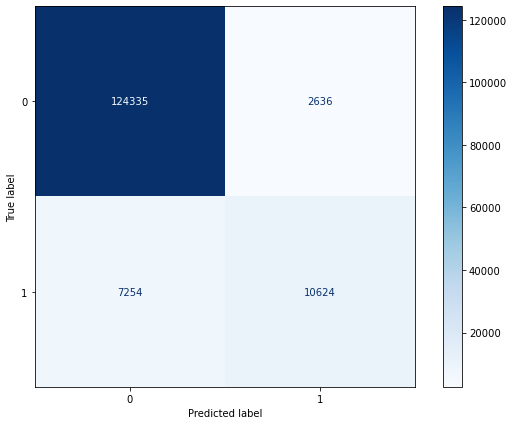

In [104]:
#plot the confusion matrix
plot_confusion_matrix(logreg_model, X_test_scaled, y_test, cmap='Blues');

Again, we can see that our model correctly predicted more data points for class 0 (**True Negative**). The **incorrect** predictions for Class 1 (**FN**) are higher than for Class 0 (**FP**). Even though we didn't have overfitting in our accuracy, we see overfitting in the confusion matrix as the **False Negatives** are higher than our **False Positive**. 

One way to fix this would be to add more features/variables or go back to our preprocessing stage and change our strategy on which features to select. 

- Adding more features:

    - For example adding **weather feature** (which needs to be imported from web for dates that the hearing took place. 
    
    - Adding 'keyword' **news feature** - what was on the news on that certain day (NLP and web scraping). 


- Update preprocessing selection:

    - For example we could only select years with higher than 5,000 cases or we could select top nationalities. Another option would be to do **forward selection** instead of using all variables at once. 
    

We could also run a Neural Network Model and control the stop point of the learning rate. 

These options could be future of work for this project. 

Next we will also look at classification report to view **precision, recall and f1-score** of our logistic regression model.

In [105]:
#look at classification report - precision and recall
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96    126971
           1       0.80      0.59      0.68     17878

    accuracy                           0.93    144849
   macro avg       0.87      0.79      0.82    144849
weighted avg       0.93      0.93      0.93    144849



**Precision** is what percent of our model predictions were correct. We can see our model correctly predicted **80%** of class 1 and **94%** of class 0. 

Let's look at our precision this way:

- Of all asylee applicants that were predicted to be granted asylum (get accepted), how many / what percentage actually got accepted? **80%**

- In this case, there were 7,254 applicants who we predicted would not be granted asylum, however they were granted asylum. 

**Recall** is what percent of positives were correctly identified. We can see our model correctly identified **59%** of positives in class 1. 

Let's look at our recall this way:

- Of all applicants who were granted asylum (accepted), how many / what percentage were we able to correctly predict? **59%**

**f1-score** is the percentage of correct positive predictions. We can see that it's **68%** for class 1 and **96%** for class 0. 

Choosing the appropriate metric depends on the business objective. For our business objective, we would like to focus on higher precision. 

Why did we pick precision? Because the **false negative** in our case is more acceptable and tolerable than false positive. Meaning that it is easier for immigration attorneys to mistakenly tell their asylee clients they will get rejected when in actuality they will get accepted. It is harder for immigration attorneys to tell their clients mistakenly that their application will be accepted and asylum will be granted when in actuality it will not. Therefore, we will choose precision as our model evaluation metric.

Immigration attorneys would prefer to under promise and over deliver. Meaning that it is better to not give asylum applicants high hopes.

If immigration attorneys were to tell applicants they will get accepted but then the case actually gets rejected, then they have to deliver bad news. On the opposite if they tell applicants that their case will most likely get rejected but it is accepted then they will be delivering good news. 

Next we will look at the ROC Curve and AUC.

### ROC Curve and AUC

Next we will visualize our model's ROC curve to see how much it is capable of distinguishing between classes.

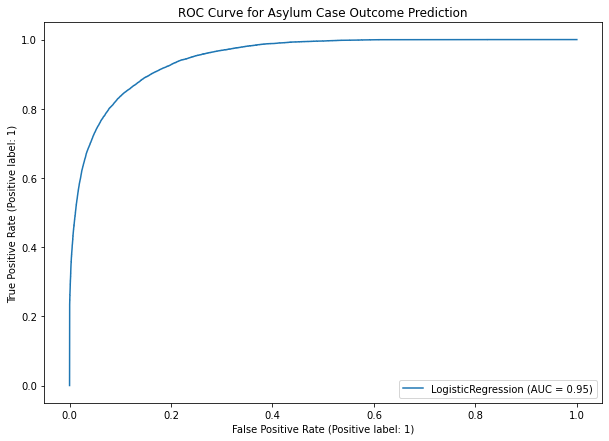

In [106]:
#import library
from sklearn.metrics import plot_roc_curve

#plot ROC curve
plot_roc_curve(logreg_model, X_test_scaled, y_test)
plt.title('ROC Curve for Asylum Case Outcome Prediction')
plt.show()

Our model's **AUC** score is **0.95**. Note that the higher the AUC score, the better our model is predicting class 0 as 0 and class 1 as 1. 

Also our model has a good measure of separability as our **AUC** score is closer to 1. This means that even with our imbalanced classes, our model is able to separate the two classes from one another. 

This is great as we might not need to use balancing methods such as downsampling, upsampling or SMOTE to balance our classes.

This concludes our best model evaluation.

---

# Summary

In this notebook, we developed several machine learning models to predict the outcomes of asylum cases.

We chose the `MinMax()` scaler and scaled our dataset. Then we used 3 different classifiers and developed 3 different Machine Learning Models:

1. Logistic Regression Model

2. Decision Trees

3. Random Forest


- Supplementary model: K-Nearest Neighbor (KNN)


Below is a detailed summary of the steps applied for each model:

**Logistic Regression Model**
- We started by fitting a baseline simple vanilla model without additional hyperparameters and the model accuracy score on the test were similar and not overfitting. 

- We used one validation to tune our c value hyperparameter and find the optimal c value. Doing so resulted in similar performance to our baseline model.

- We also used Principle Components Analysis (PCA) to reduce the dimensionality of our dataset and were able to get very similar results by using almost 83% less dimensions - 182 dimensional data vs. our original 1,036 dimensional data.

- We also looked at our model's coefficients to find 20 features most predictive of acceptance and 20 features most predictive of rejection in asylum case outcomes. 

    - Features such as `CASE_DESCRIPTION_Credible Fear Review`,  and `CASE_DESCRIPTION_Reasonable Fear Case` had very high coefficients and were most predictive of acceptance. 
    
    - Features such as `ABSENTIA_Yes` and `DATE_OF_ENTRY_YEAR` had the highest negative coefficients and were most predictive of rejection. 
    
    
- We also performed a 5-Fold Cross Validation and found that optimal C value was 1. However our test accuracy was not as well as our optimized model with one validation. 

    
**Decision Trees**
- We started with a baseline model however as decision trees have a tendency to overfit, we saw a very high overfitting from our first baseline model.
- We then adjusted the `max_depth` hyperparameter in our model and saw less overfitting. 
- We used a validation set to find the optimal `max_depth` hyperparameter for our model and refitted our model again. 

**Random Forest**
- For our random forest model we looped through ranges for n_estimators, however since we hadn't set max_depth we saw overfitting. After setting the max_depth, we re-ran our loop and found than best n_estimators was 3. Our model performed lower than all previous models but it was not overfitting in the accuracy score.

**K-Nearest Neighbor (KNN)**
- Similar to the previous model, we started by fitting a baseline simple vanilla model for our KNN using the default `n_neighbors` hyperparameter which is 5. Our model did not perform well.
- For the second model we ran a for loop through different ranges of neighbors for `n_neighbors` hyperparameter, we found the optimal value for K and refit our model with the new optimal value which resulted in better performance. 

**Model Evaluation**
- We evaluated our best model which was the **Optimized Logistic Regression Model**. Our model correctly predicted more data points for class 0 (**True Negative**). The incorrect predictions for Class 1 (FN) are higher than for Class 0 (FP). Even though we didn't have overfitting in our accuracy, we saw **overfitting in the confusion matrix** as the **False Negatives were higher than our False Positive**.


- Looking at **precision**:
    - Our model correctly predicted **80% of class 1** and **94% of class 0**.
    - Of all asylee applicants that were predicted to be granted asylum (get accepted), we were able to correctly predict 80%.
    
    
- Looking at **recall**:
    - Our model correctly identified 59% of positives in class 1 and 98% in class 0.
    - Of all applicants who were granted asylum (accepted),we were we able to correctly predict 59%. 
    
    
- Looking at **ROC Curve and AUC score**:
    - Our model's AUC score was 0.95. 
    - Our model had a good measure of separability as our AUC score was closer to 1. This means that even with our imbalanced classes, our model was able to separate the two classes from one another.
    
We discussed how choosing the appropriate metric depends on the business objective. For our business objective, we chose to focus on higher precision.

Why did we pick precision? Because the false negative in our case is more acceptable and tolerable than false positive. Meaning that it is easier for immigration attorneys to mistakenly tell their asylee clients they will get rejected when in actuality they will get accepted. It is harder for immigration attorneys to tell their clients mistakenly that their application will be accepted and asylum will be granted when in actuality it will not. Therefore, we chose precision as our model evaluation metric.
    
This concludes our modeling for notebook 3. We will run another model (XGBoost Model) in notebook 4 and compare its performance to our best model from notebook 3 (Optimized Logistic Regression Model). 

---